In [1]:
import keras
import tensorflow as tf

tf_config = tf.ConfigProto()
tf_config.gpu_options.allow_growth = True

#Importing the VAE and RNN.
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

Using TensorFlow backend.


/home/kaiolae/code/word_models_keras_test/WorldModels


In [2]:

import analyze_rnn_predictions
%load_ext autoreload
%autoreload 2 #If we want to automatically load external modules as they are updated.

/home/kaiolae/code/word_models_keras_test/WorldModels


In [3]:
#To access gym
import sys
sys.path.append('/home/kaiolae/.virtualenvs/worldmodels/lib/python3.5/site-packages')
import os

In [4]:
import fnmatch
def get_all_models():
    all_models = {} #Dict of all models, with num mixtures as key
    for folder in os.listdir('../'):
        
        if fnmatch.fnmatch(folder, 'trained_sequential_rnn_*') :
            mixtures_start_index = folder.find('rnn_')+4
            mixtures_end_index = folder.find('mixtures')
            num_mixtures = int(folder[mixtures_start_index:mixtures_end_index])
            if num_mixtures in all_models.keys():
                all_models[num_mixtures].append("../"+folder)
            else:
                all_models[num_mixtures] = ["../"+folder]
            
    return all_models
            
print(get_all_models())

{1: ['../trained_sequential_rnn_1mixtures_run10', '../trained_sequential_rnn_1mixtures_run5', '../trained_sequential_rnn_1mixtures_run2', '../trained_sequential_rnn_1mixtures_run7', '../trained_sequential_rnn_1mixtures_run11', '../trained_sequential_rnn_1mixtures_run13', '../trained_sequential_rnn_1mixtures_run9', '../trained_sequential_rnn_1mixtures_run1', '../trained_sequential_rnn_1mixtures_run14', '../trained_sequential_rnn_1mixtures_run6', '../trained_sequential_rnn_1mixtures_run3', '../trained_sequential_rnn_1mixtures_run12', '../trained_sequential_rnn_1mixtures_run8', '../trained_sequential_rnn_1mixtures_run4'], 2: ['../trained_sequential_rnn_2mixtures_run12', '../trained_sequential_rnn_2mixtures_run3', '../trained_sequential_rnn_2mixtures_run11', '../trained_sequential_rnn_2mixtures_run13', '../trained_sequential_rnn_2mixtures_run7', '../trained_sequential_rnn_2mixtures_run8', '../trained_sequential_rnn_2mixtures_run2', '../trained_sequential_rnn_2mixtures_run14', '../trained_s

In [5]:
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import display, HTML


def plot_movie_mp4(image_array):
    dpi = 2.0
    xpixels, ypixels = image_array[0].shape[0], image_array[0].shape[1]
    fig = plt.figure(figsize=(ypixels/dpi, xpixels/dpi), dpi=dpi)
    #fig = plt.figure(figsize=(1,1), dpi=dpi)
    im = plt.figimage(image_array[0])

    def animate(i):
        im.set_array(image_array[i])
        return (im,)

    anim = animation.FuncAnimation(fig, animate, frames=len(image_array))
    display(HTML(anim.to_html5_video()))

In [6]:
from collections import namedtuple

rnn_analyzers = {}
filename = "rnn_trained_model.h5"
for key, val in get_all_models().items():
    rnn_analyzers[key] = []
    for model in val:
        if filename not in os.listdir(model):
            print("Unfinished run. Skipping.")
            continue
        print("Loading model: ", model)
        new_analyzer = analyze_rnn_predictions.RNNAnalyzer(model+"/"+filename, key, 0.2) #TODO Note, I previously used temp=0.1 - Which Ha noted was so low that we got mode collapse.
        rnn_analyzers[key].append(new_analyzer)
print("rnn analyzers: ", rnn_analyzers)

Unfinished run. Skipping.
Unfinished run. Skipping.
Loading model:  ../trained_sequential_rnn_1mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 32, 32, 32)   416         conv2d_1[0][0]                   
__________________________________________________________________________________________________
conv2d_3 (Con

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_21 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 32, 32, 32)   416         conv2d_21[0][0]                  
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 129)                  33153     
Total params: 362,881
Trainable params: 362,881
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_1mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_1mixtures_run8
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_41 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 32, 32, 32)   416         conv2d_41[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_62 (Conv2D)              (None, 32, 32, 32)   416         conv2d_61[0][0]                  
__________________________________________________________________________________________________
conv2d_63 (Conv2D)              (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_2mixtures_run4
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_81 (Conv2D)              (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_82 (Conv2D)              (None, 32, 32, 32)   416         conv2d_81[0][0]                  
__________________________________________________________________________________________________
conv2d_83 (Conv2D)              (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 258)                  66306     
Total params: 396,034
Trainable params: 396,034
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_2mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_101 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_102 (Conv2D)             (None, 32, 32, 32)   416         conv2d_101[0][0]                 
__________________________________________________________________________________________________
conv2d_103 (Conv2D)             (None, 16, 16, 32)   4128       

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_8mixtures_run2
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_121 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_122 (Conv2D)             (None, 32, 32, 32)   416         conv2d_121[0][0]                 
__________________________________________________________________________________________________
conv2d_123 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 1032)                 265224    
Total params: 594,952
Trainable params: 594,952
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_8mixtures_run13
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run9
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_141 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_142 (Conv2D)             (None, 32, 32, 32)   416         conv2d_141[0][0]                 
__________________________________________________________________________________________________
conv2d_143 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run3
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
____________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run1
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_161 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_162 (Conv2D)             (None, 32, 32, 32)   416         conv2d_161[0][0]                 
__________________________________________________________________________________________________
conv2d_163 (Conv2D)             (None, 16, 16, 32)   4128        

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input_LSTM (LSTM)            (1, 256)                  329728    
_________________________________________________________________
decoder_output_MDN (MDN)     (1, 516)                  132612    
Total params: 462,340
Trainable params: 462,340
Non-trainable params: 0
_________________________________________________________________
Loading model:  ../trained_sequential_rnn_4mixtures_run11
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
___________________________________________________________________________________________

Loading model:  ../trained_sequential_rnn_4mixtures_run14
VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_181 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_182 (Conv2D)             (None, 32, 32, 32)   416         conv2d_181[0][0]                 
__________________________________________________________________________________________________
conv2d_183 (Conv2D)             (None, 16, 16, 32)   4128       

In [7]:
#Get a start video
#Getting data to feed into the VAE and RNN
import numpy as np
import os
# load preprocessed data
training_data = np.load(os.path.join("../rnn_data_64_dim", "rnn_training_data.npz"))
action_data = training_data['action']
observation_data = training_data['latent']

episode_num = 16
single_action_sequence = action_data[episode_num]
single_latent_sequence = observation_data[episode_num]
print("Actions length: ", len(single_action_sequence))
print("Latent vectors length: ", len(single_latent_sequence))
num_frames = len(single_latent_sequence)



#Decode all 100 vectors, store as video
#Visualize video.

Actions length:  177
Latent vectors length:  177


In [85]:
#Decode a sequence with the VAE and visualize it
def decode_and_visualize(latent_vector_sequence, rnn_analyzer):
    plot_movie_mp4(rnn_analyzer.decode_with_vae(latent_vector_sequence))

In [86]:
def calc_mixture_weights_and_events_dreaming(rnn_analyzer, dream_steps=100):
    #Analyzing a single model
    WARM_UP_STEPS = 100
    previous_z = single_latent_sequence[WARM_UP_STEPS]

    mixture_weight_history = []
    z_history = []
    rnn_analyzer._reset()
    rnn_analyzer.warm_up_lstm(single_action_sequence, single_latent_sequence)
    for i in range(dream_steps):
        previous_z, mixture_weights = rnn_analyzer.predict_one_step(0, previous_z, sigma_temp=0.01)
        z_history.append(previous_z)
        mixture_weight_history.append(mixture_weights)
    return np.array(mixture_weight_history), np.array(z_history)

In [87]:
def visualize_mixture_weights_and_events(weights_sequence, z_sequence, rnn_analyzer):
    plt.plot(weights_sequence)
    plt.figure(figsize=(20,10))
    columns = 4
    counter = 0
    skip_image = 5
    decoded_images = rnn_analyzer.decode_with_vae(z_sequence)
    plot_counter = 0
    for d in decoded_images:
        if counter%skip_image == 0:
            if plot_counter%columns == 0:
                print("Timestep: ", counter)
            plt.subplot((len(z_sequence)//skip_image)//columns + 1, columns, plot_counter+1)
            plt.imshow(d)
            plot_counter+=1
        counter+=1

zs are  [[-0.77678868 -0.16965509  0.01585982 ...  0.92897558  0.3500834
   0.63918272]
 [-0.74318369 -0.32999108 -0.02947939 ...  0.82734347  0.46903804
   0.52907905]
 [-0.70758392 -0.47326413 -0.00979209 ...  0.78764695  0.47614104
   0.47418668]
 ...
 [ 0.16032697 -0.48963145 -0.07623296 ...  0.65769465  0.17747018
  -0.21834447]
 [ 0.13708253 -0.48320356 -0.07409646 ...  0.65630972  0.18668762
  -0.18651721]
 [ 0.1332997  -0.48126206 -0.0805802  ...  0.68461176  0.21123321
  -0.20548214]]
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80


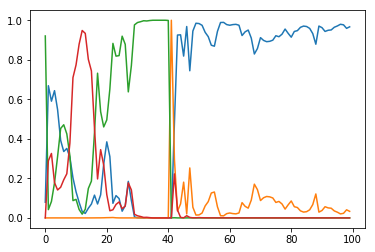

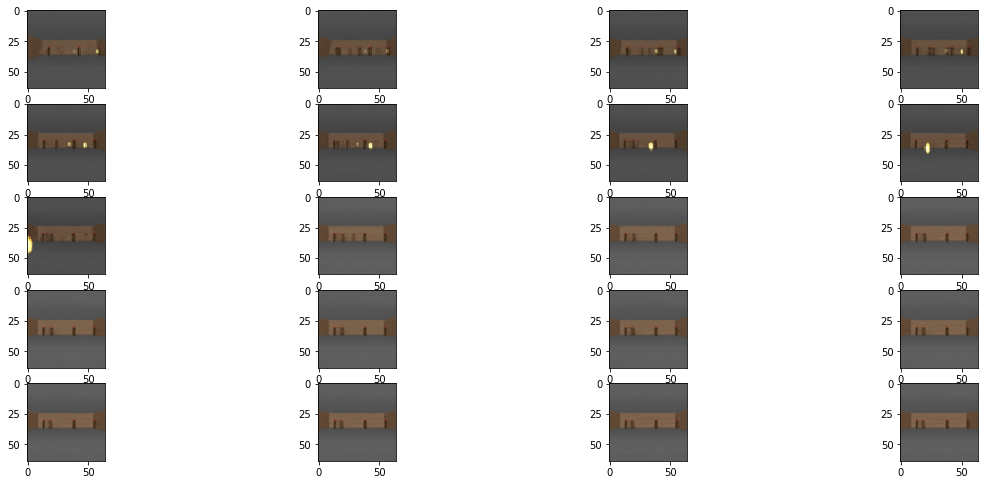

In [88]:
analyzer1= rnn_analyzers[4][7]
weights, zs = calc_mixture_weights_and_events_dreaming(analyzer1)
print("zs are ", zs)
visualize_mixture_weights_and_events(weights, zs, analyzer1)


In [89]:
new_analyzer = analyze_rnn_predictions.RNNAnalyzer("../trained_sequential_rnn_4mixtures_run9/rnn_trained_model.h5", 4, 0.01)
weights, zs = calc_mixture_weights_and_events_dreaming(new_analyzer)
decoded_images = new_analyzer.decode_with_vae(zs)
plot_movie_mp4(decoded_images)

VAE init
Shape before flattening: (None, 16, 16, 32)
KL Shape: (None,)
Xent shape: ()
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
conv2d_189 (Conv2D)             (None, 64, 64, 3)    39          encoder_input[0][0]              
__________________________________________________________________________________________________
conv2d_190 (Conv2D)             (None, 32, 32, 32)   416         conv2d_189[0][0]                 
__________________________________________________________________________________________________
conv2d_191 (Conv2D)             (None, 16, 16, 32)   4128        conv2d_190[0][0]                 
_______________________

<Figure size 64x64 with 0 Axes>

In [90]:
import count_monsters_and_balls
import numpy as np
import collections
FIREBALL_THRESHOLD = 0.5
WALL_THRESHOLD = 0.39

def count_appearances_of_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][1]

def name_most_common_element_in_array(array):
    array=np.array(array)
    c = collections.Counter(array)
    m_c = c.most_common()
    print(m_c)
    if len(m_c)==0:
        return 0
    return m_c[0][0]

#This measures how often the same event is captured by the same mixture.
#However, that is not enough: We also need to make sure the handling of the event is
#unique to that mixture. That is, we have to measure if that mixture also handles other events.
def measure_dominating_mixture_for_events(analyzer, num_steps = 100):
    # Measuring the tendency for different events to be modelled by different gaussians
    weights, zs = calc_mixture_weights_and_events_dreaming(analyzer,num_steps)
    dominating_mixture_during_explosions = []
    dominating_mixture_during_fireball = []
    dominating_mixture_during_wall_left = []
    dominating_mixture_during_wall_right = []
    dominating_mixture_otherwise = []

    decoded_images = analyzer.decode_with_vae(zs)
    visualize_mixture_weights_and_events(weights, zs, analyzer)
    for img_counter in range(len(decoded_images)):
        img = decoded_images[img_counter]
        weight_vector = weights[img_counter]
        dominating_mixture = np.argmax(weight_vector)
        is_exploding = count_monsters_and_balls.is_there_a_big_explosion(img, FIREBALL_THRESHOLD)
        is_fireball, _ = count_monsters_and_balls.count_fireballs(img, FIREBALL_THRESHOLD)
        is_left_wall = count_monsters_and_balls.is_there_a_lefthand_wall(img, WALL_THRESHOLD)
        is_right_wall = count_monsters_and_balls.is_there_a_righthand_wall(img, WALL_THRESHOLD)

        no_events_seen = True
        if is_exploding:
            dominating_mixture_during_explosions.append(dominating_mixture)
            no_events_seen = False
        #elif is_fireball:
        #    dominating_mixture_during_fireball.append(dominating_mixture)
        #    no_events_seen = False
        elif is_left_wall:
            dominating_mixture_during_wall_left.append(dominating_mixture)
            no_events_seen = False
        elif is_right_wall:
            dominating_mixture_during_wall_right.append(dominating_mixture)
            no_events_seen = False

        if no_events_seen:
            dominating_mixture_otherwise.append(dominating_mixture) #TODO Add walls

    results = {"explosion_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "explosion_other" : len(dominating_mixture_during_explosions) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_explosions),
               "fireball_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "fireball_other" : len(dominating_mixture_during_fireball) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_fireball),
               "left_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "left_wall_other" : len(dominating_mixture_during_wall_left) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_left),
               "right_wall_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "right_wall_other" : len(dominating_mixture_during_wall_right) - count_appearances_of_most_common_element_in_array(dominating_mixture_during_wall_right),
               "otherwise_main" : count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise),
               "otherwise_other" : len(dominating_mixture_otherwise) - count_appearances_of_most_common_element_in_array(dominating_mixture_otherwise)}
    
    all_events_for_each_mixture = {}
    all_events = [dominating_mixture_during_explosions, dominating_mixture_during_fireball,
                 dominating_mixture_during_wall_left, dominating_mixture_during_wall_right,
                 dominating_mixture_otherwise]
    
    event_counter = 0
    for event in all_events:
        for mixture in event:
            if mixture in all_events_for_each_mixture.keys():
                all_events_for_each_mixture[mixture].append(event_counter)
            else:
                all_events_for_each_mixture[mixture] = [event_counter]
        event_counter +=1
        
    main_mixture_for_explosions = name_most_common_element_in_array(dominating_mixture_during_explosions)
    main_mixture_for_fireball = name_most_common_element_in_array(dominating_mixture_during_fireball)
    main_mixture_for_left_wall = name_most_common_element_in_array(dominating_mixture_during_wall_left)
    main_mixture_for_right_wall = name_most_common_element_in_array(dominating_mixture_during_wall_right)
    main_mixture_otherwise = name_most_common_element_in_array(dominating_mixture_otherwise)
    main_mixtures_for_events = {"explosion" : main_mixture_for_explosions,
                               "fireball" : main_mixture_for_fireball,
                               "left_wall" : main_mixture_for_left_wall,
                               "right_wall" : main_mixture_for_right_wall,
                               "otherwise" : main_mixture_otherwise}
    
    
    return results, all_events_for_each_mixture, main_mixtures_for_events
               

Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
[(2, 20), (0, 16)]
[(2, 20), (0, 16)]
[]
[]
[]
[]
[]
[]
[(0, 39), (2, 16), (3, 9)]
[(0, 39), (2, 16), (3, 9)]
[(2, 20), (0, 16)]
[]
[]
[]
[(0, 39), (2, 16), (3, 9)]
{0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 2: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], 3: [4, 4, 4, 4, 4, 4, 4, 4, 4]}
{'explosion_main': 20, 'explosion_other': 16, 'fireball_main': 0, 'fireball_other': 0, 'left_wall_main': 0, 'left_wall_other': 0, 'right_wall_main': 0, 'right_wall_other': 0, 'otherwise_main': 39, 'otherwise_other': 25}
{'explosion': 2, 'fireball': 0, 'left_wall': 0, 'right_wall': 0, 'otherwise': 0}


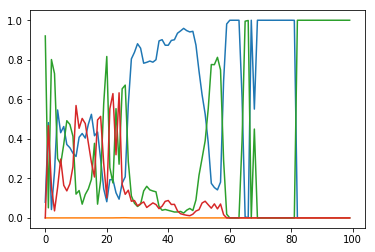

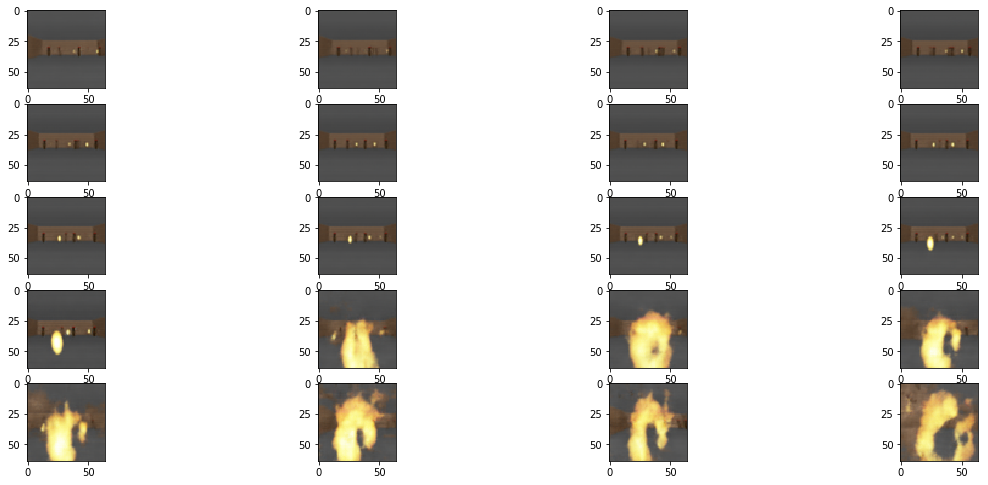

In [97]:
event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(analyzer1, 100)
print(mixture_to_event)
print(event_to_mixture)
print(main_mixture)



1
2
8
4
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 188), (3, 58), (1, 56)]
[(0, 188), (3, 58), (1, 56)]
[]
[]
[(3, 20), (0, 20), (2, 7), (1, 2)]
[(3, 20), (0, 20), (2, 7), (1, 2)]
[(0, 104), (3, 46), (2, 16), (1, 9)]
[(0, 104), (3, 46), (2, 16), (1, 9)]
[(0, 332), (3, 51), (1, 50), (2, 41)]
[(

Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[]
[]
[]
[]
[]
[]
[(0, 9)]
[(0, 9)]
[(0, 909), (3, 41), (1, 22), (2, 19)]
[(0, 909), (3, 41), (1, 22), (2, 19)]
[]
[]
[]
[(0, 9)]
[(0, 909), (3, 41), (1, 22), (2, 19)]
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  82

Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 226), (3, 8), (2, 1)]
[(0, 226), (3, 8), (2, 1)]
[]
[]
[(2, 413), (3, 12)]
[(2, 413), (3, 12)]
[(2, 159), (1, 2)]
[(2, 159), (1, 2)]
[(2, 116), (3, 35), (0, 24), (1, 4)]
[(2, 116), (3, 35), (0, 24), (1, 4)]
[(0, 226), (3, 8), (2, 1)]
[]
[(2, 413), (3, 12)]
[(2, 159), (1, 2)]
[(2, 116), (3, 35), (0, 24), (1, 4)]
Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  38

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 138), (0, 82), (3, 18), (1, 4)]
[(2, 138), (0, 82), (3, 18), (1, 4)]
[]
[]
[(0, 91), (3, 24), (2, 7), (1, 4)]
[(0, 91), (3, 24), (2, 7), (1, 4)]
[(2, 4), (3, 2)]
[(2, 4), (3, 2)]
[(0, 443), (2, 124), (3, 39), (1, 20)]
[(0, 443), (2, 124), (3, 39), (1,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 20), (0, 7), (1, 3)]
[(3, 20), (0, 7), (1, 3)]
[]
[]
[(2, 256), (3, 88), (1, 47)]
[(2, 256), (3, 88), (1, 47)]
[(2, 215), (3, 93), (0, 13), (1, 8)]
[(2, 215), (3, 93), (0, 13), (1, 8)]
[(2, 86), (3, 79), (0, 70), (1, 15)]
[(2, 86), (3, 79), (0, 70), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 74), (2, 12), (0, 2)]
[(1, 74), (2, 12), (0, 2)]
[]
[]
[(3, 304), (0, 122), (1, 32), (2, 3)]
[(3, 304), (0, 122), (1, 32), (2, 3)]
[(0, 2)]
[(0, 2)]
[(3, 257), (1, 83), (2, 60), (0, 49)]
[(3, 257), (1, 83), (2, 60), (0, 49)]
[(1, 74), (2, 12), (0, 2)]

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 312), (3, 229), (0, 49), (2, 3)]
[(1, 312), (3, 229), (0, 49), (2, 3)]
[]
[]
[(1, 24), (3, 17), (2, 2)]
[(1, 24), (3, 17), (2, 2)]
[(3, 27), (1, 19), (0, 4)]
[(3, 27), (1, 19), (0, 4)]
[(0, 182), (3, 73), (1, 45), (2, 14)]
[(0, 182), (3, 73), (1, 45),

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 17), (0, 13)]
[(1, 17), (0, 13)]
[]
[]
[]
[]
[]
[]
[(2, 866), (0, 85), (1, 16), (3, 3)]
[(2, 866), (0, 85), (1, 16), (3, 3)]
[(1, 17), (0, 13)]
[]
[]
[]
[(2, 866), (0, 85), (1, 16), (3, 3)]
1
2
8
4


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 19), (0, 18), (1, 17)]
[(3, 19), (0, 18), (1, 17)]
[]
[]
[(0, 370), (3, 47), (2, 20), (1, 6)]
[(0, 370), (3, 47), (2, 20), (1, 6)]
[(0, 143), (3, 41), (1, 20), (2, 11)]
[(0, 143), (3, 41), (1, 20), (2, 11)]
[(0, 221), (2, 33), (1, 23), (3, 11)]
[(0, 2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 55), (0, 10), (3, 2)]
[(2, 55), (0, 10), (3, 2)]
[]
[]
[(2, 1)]
[(2, 1)]
[]
[]
[(3, 882), (0, 22), (2, 22), (1, 6)]
[(3, 882), (0, 22), (2, 22), (1, 6)]
[(2, 55), (0, 10), (3, 2)]
[]
[(2, 1)]
[]
[(3, 882), (0, 22), (2, 22), (1, 6)]


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 125), (2, 22), (0, 3), (3, 1)]
[(1, 125), (2, 22), (0, 3), (3, 1)]
[]
[]
[(3, 127), (1, 25), (0, 20), (2, 6)]
[(3, 127), (1, 25), (0, 20), (2, 6)]
[(2, 8), (3, 3), (1, 1)]
[(2, 8), (3, 3), (1, 1)]
[(0, 430), (3, 95), (2, 90), (1, 44)]
[(0, 430), (3, 9

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 386), (3, 11), (1, 3)]
[(0, 386), (3, 11), (1, 3)]
[]
[]
[(2, 126), (0, 45), (3, 35), (1, 1)]
[(2, 126), (0, 45), (3, 35), (1, 1)]
[(0, 1)]
[(0, 1)]
[(2, 222), (0, 96), (3, 67), (1, 7)]
[(2, 222), (0, 96), (3, 67), (1, 7)]
[(0, 386), (3, 11), (1, 3)]


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 4), (2, 2)]
[(3, 4), (2, 2)]
[]
[]
[(1, 49), (2, 15), (0, 1)]
[(1, 49), (2, 15), (0, 1)]
[(1, 20), (2, 9), (0, 1)]
[(1, 20), (2, 9), (0, 1)]
[(1, 802), (2, 45), (3, 32), (0, 20)]
[(1, 802), (2, 45), (3, 32), (0, 20)]
[(3, 4), (2, 2)]
[]
[(1, 49), (2, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 46), (1, 6)]
[(3, 46), (1, 6)]
[]
[]
[(2, 226), (3, 53), (0, 5), (1, 3)]
[(2, 226), (3, 53), (0, 5), (1, 3)]
[(3, 9)]
[(3, 9)]
[(2, 535), (1, 70), (3, 35), (0, 12)]
[(2, 535), (1, 70), (3, 35), (0, 12)]
[(3, 46), (1, 6)]
[]
[(2, 226), (3, 53), (0, 5),

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 135), (1, 82), (0, 1)]
[(3, 135), (1, 82), (0, 1)]
[]
[]
[(2, 106), (3, 14), (1, 6)]
[(2, 106), (3, 14), (1, 6)]
[(2, 37), (1, 14), (0, 8), (3, 5)]
[(2, 37), (1, 14), (0, 8), (3, 5)]
[(2, 437), (0, 56), (1, 52), (3, 47)]
[(2, 437), (0, 56), (1, 52), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 80), (0, 17), (3, 5), (1, 1)]
[(2, 80), (0, 17), (3, 5), (1, 1)]
[]
[]
[(0, 89), (2, 9), (1, 7), (3, 7)]
[(0, 89), (2, 9), (1, 7), (3, 7)]
[(3, 6), (0, 1), (2, 1)]
[(3, 6), (0, 1), (2, 1)]
[(0, 715), (2, 39), (3, 20), (1, 3)]
[(0, 715), (2, 39), (3, 2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 23), (1, 2)]
[(3, 23), (1, 2)]
[]
[]
[(3, 4)]
[(3, 4)]
[(2, 92), (3, 14), (1, 4)]
[(2, 92), (3, 14), (1, 4)]
[(2, 753), (0, 54), (3, 43), (1, 11)]
[(2, 753), (0, 54), (3, 43), (1, 11)]
[(3, 23), (1, 2)]
[]
[(3, 4)]
[(2, 92), (3, 14), (1, 4)]
[(2, 753)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 66), (2, 52), (0, 9)]
[(1, 66), (2, 52), (0, 9)]
[]
[]
[(3, 110), (1, 52), (0, 51), (2, 15)]
[(3, 110), (1, 52), (0, 51), (2, 15)]
[(2, 61), (3, 18), (0, 14), (1, 13)]
[(2, 61), (3, 18), (0, 14), (1, 13)]
[(3, 226), (0, 137), (2, 105), (1, 71)]
[(3, 2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 259), (3, 198), (0, 4), (2, 1)]
[(1, 259), (3, 198), (0, 4), (2, 1)]
[]
[]
[(0, 177), (1, 17), (3, 14), (2, 10)]
[(0, 177), (1, 17), (3, 14), (2, 10)]
[(0, 34), (3, 12)]
[(0, 34), (3, 12)]
[(0, 181), (3, 49), (1, 40), (2, 4)]
[(0, 181), (3, 49), (1, 4

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 192), (0, 62), (3, 12), (2, 2)]
[(1, 192), (0, 62), (3, 12), (2, 2)]
[]
[]
[(2, 222), (1, 37), (0, 33), (3, 11)]
[(2, 222), (1, 37), (0, 33), (3, 11)]
[(2, 32), (1, 31), (0, 25), (3, 14)]
[(2, 32), (1, 31), (0, 25), (3, 14)]
[(2, 198), (0, 56), (1, 52

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 66), (3, 49), (0, 44)]
[(1, 66), (3, 49), (0, 44)]
[]
[]
[(0, 543), (2, 35), (3, 23), (1, 15)]
[(0, 543), (2, 35), (3, 23), (1, 15)]
[(3, 13), (0, 8), (1, 7), (2, 6)]
[(3, 13), (0, 8), (1, 7), (2, 6)]
[(0, 101), (1, 56), (3, 32), (2, 2)]
[(0, 101), (1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 60), (0, 2), (1, 1)]
[(2, 60), (0, 2), (1, 1)]
[]
[]
[(3, 50), (2, 2)]
[(3, 50), (2, 2)]
[]
[]
[(3, 801), (2, 38), (1, 26), (0, 20)]
[(3, 801), (2, 38), (1, 26), (0, 20)]
[(2, 60), (0, 2), (1, 1)]
[]
[(3, 50), (2, 2)]
[]
[(3, 801), (2, 38), (1, 26), (

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 99), (2, 10), (3, 1)]
[(1, 99), (2, 10), (3, 1)]
[]
[]
[(3, 87), (0, 55), (1, 29), (2, 7)]
[(3, 87), (0, 55), (1, 29), (2, 7)]
[(0, 25), (3, 22)]
[(0, 25), (3, 22)]
[(0, 434), (2, 114), (3, 80), (1, 37)]
[(0, 434), (2, 114), (3, 80), (1, 37)]
[(1, 99)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[]
[]
[]
[]
[(2, 369), (3, 20), (1, 16), (0, 3)]
[(2, 369), (3, 20), (1, 16), (0, 3)]
[(2, 128), (1, 4)]
[(2, 128), (1, 4)]
[(2, 371), (3, 39), (1, 26), (0, 24)]
[(2, 371), (3, 39), (1, 26), (0, 24)]
[]
[]
[(2, 369), (3, 20), (1, 16), (0, 3)]
[(2, 128), (1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 101), (2, 6), (1, 4), (0, 1)]
[(3, 101), (2, 6), (1, 4), (0, 1)]
[]
[]
[(2, 43), (1, 43), (3, 22), (0, 15)]
[(2, 43), (1, 43), (3, 22), (0, 15)]
[(1, 75), (2, 3), (0, 3)]
[(1, 75), (2, 3), (0, 3)]
[(1, 533), (2, 86), (3, 53), (0, 12)]
[(1, 533), (2, 8

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 24), (0, 1), (1, 1)]
[(3, 24), (0, 1), (1, 1)]
[]
[]
[(2, 256)]
[(2, 256)]
[(2, 65), (3, 17), (0, 3), (1, 2)]
[(2, 65), (3, 17), (0, 3), (1, 2)]
[(2, 547), (1, 39), (3, 34), (0, 11)]
[(2, 547), (1, 39), (3, 34), (0, 11)]
[(3, 24), (0, 1), (1, 1)]
[]
[

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 166), (1, 81), (2, 21)]
[(3, 166), (1, 81), (2, 21)]
[]
[]
[(1, 30), (3, 2), (2, 2)]
[(1, 30), (3, 2), (2, 2)]
[(1, 7), (3, 2)]
[(1, 7), (3, 2)]
[(2, 594), (1, 65), (3, 24), (0, 6)]
[(2, 594), (1, 65), (3, 24), (0, 6)]
[(3, 166), (1, 81), (2, 21)]
[]


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 14), (0, 4)]
[(2, 14), (0, 4)]
[]
[]
[(0, 5)]
[(0, 5)]
[]
[]
[(0, 826), (2, 102), (3, 28), (1, 21)]
[(0, 826), (2, 102), (3, 28), (1, 21)]
[(2, 14), (0, 4)]
[]
[(0, 5)]
[]
[(0, 826), (2, 102), (3, 28), (1, 21)]


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 33), (0, 5), (1, 1)]
[(3, 33), (0, 5), (1, 1)]
[]
[]
[(2, 505), (3, 141), (0, 32), (1, 23)]
[(2, 505), (3, 141), (0, 32), (1, 23)]
[(2, 35), (3, 23), (0, 11), (1, 3)]
[(2, 35), (3, 23), (0, 11), (1, 3)]
[(2, 64), (0, 58), (3, 57), (1, 9)]
[(2, 64), (0

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 36), (0, 2), (2, 1)]
[(1, 36), (0, 2), (2, 1)]
[]
[]
[(3, 12)]
[(3, 12)]
[(3, 62), (0, 11), (2, 4), (1, 3)]
[(3, 62), (0, 11), (2, 4), (1, 3)]
[(3, 753), (2, 57), (0, 31), (1, 28)]
[(3, 753), (2, 57), (0, 31), (1, 28)]
[(1, 36), (0, 2), (2, 1)]
[]
[(3

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 238), (1, 233), (0, 11), (2, 1)]
[(3, 238), (1, 233), (0, 11), (2, 1)]
[]
[]
[(0, 30), (1, 15), (3, 5), (2, 1)]
[(0, 30), (1, 15), (3, 5), (2, 1)]
[(0, 108), (1, 97), (3, 76), (2, 13)]
[(0, 108), (1, 97), (3, 76), (2, 13)]
[(3, 96), (1, 45), (0, 24), 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 86), (0, 27), (3, 4), (2, 1)]
[(1, 86), (0, 27), (3, 4), (2, 1)]
[]
[]
[(2, 39), (1, 17), (0, 3)]
[(2, 39), (1, 17), (0, 3)]
[(1, 86), (0, 26), (2, 21), (3, 5)]
[(1, 86), (0, 26), (2, 21), (3, 5)]
[(2, 606), (1, 41), (0, 33), (3, 5)]
[(2, 606), (1, 41

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 44), (3, 16), (1, 10)]
[(0, 44), (3, 16), (1, 10)]
[]
[]
[(0, 647), (3, 44), (2, 34), (1, 24)]
[(0, 647), (3, 44), (2, 34), (1, 24)]
[]
[]
[(0, 98), (1, 53), (3, 29), (2, 1)]
[(0, 98), (1, 53), (3, 29), (2, 1)]
[(0, 44), (3, 16), (1, 10)]
[]
[(0, 647)

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 130), (0, 25), (1, 4)]
[(2, 130), (0, 25), (1, 4)]
[]
[]
[(2, 5), (3, 1)]
[(2, 5), (3, 1)]
[(3, 8), (2, 4)]
[(3, 8), (2, 4)]
[(3, 726), (2, 51), (0, 34), (1, 12)]
[(3, 726), (2, 51), (0, 34), (1, 12)]
[(2, 130), (0, 25), (1, 4)]
[]
[(2, 5), (3, 1)]
[(

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 61), (2, 19)]
[(1, 61), (2, 19)]
[]
[]
[(0, 4), (1, 3), (2, 1)]
[(0, 4), (1, 3), (2, 1)]
[(3, 36), (1, 14), (2, 10), (0, 1)]
[(3, 36), (1, 14), (2, 10), (0, 1)]
[(0, 741), (1, 52), (3, 35), (2, 23)]
[(0, 741), (1, 52), (3, 35), (2, 23)]
[(1, 61), (2, 

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(0, 172), (3, 9)]
[(0, 172), (3, 9)]
[]
[]
[(2, 195), (3, 30), (0, 21), (1, 11)]
[(2, 195), (3, 30), (0, 21), (1, 11)]
[]
[]
[(2, 462), (0, 50), (3, 26), (1, 24)]
[(2, 462), (0, 50), (3, 26), (1, 24)]
[(0, 172), (3, 9)]
[]
[(2, 195), (3, 30), (0, 21), (1,

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 81), (2, 5)]
[(3, 81), (2, 5)]
[]
[]
[(1, 24)]
[(1, 24)]
[(1, 47), (2, 10), (3, 2)]
[(1, 47), (2, 10), (3, 2)]
[(1, 768), (2, 39), (3, 17), (0, 7)]
[(1, 768), (2, 39), (3, 17), (0, 7)]
[(3, 81), (2, 5)]
[]
[(1, 24)]
[(1, 47), (2, 10), (3, 2)]
[(1, 768

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 169), (1, 18), (2, 6)]
[(3, 169), (1, 18), (2, 6)]
[]
[]
[(2, 99), (3, 20), (0, 3), (1, 2)]
[(2, 99), (3, 20), (0, 3), (1, 2)]
[]
[]
[(2, 667), (1, 10), (3, 4), (0, 2)]
[(2, 667), (1, 10), (3, 4), (0, 2)]
[(3, 169), (1, 18), (2, 6)]
[]
[(2, 99), (3, 2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 292), (1, 119), (2, 5), (0, 1)]
[(3, 292), (1, 119), (2, 5), (0, 1)]
[]
[]
[(2, 8), (3, 6), (0, 1)]
[(2, 8), (3, 6), (0, 1)]
[(3, 18), (1, 16), (2, 4)]
[(3, 18), (1, 16), (2, 4)]
[(2, 411), (3, 54), (1, 37), (0, 28)]
[(2, 411), (3, 54), (1, 37), (0, 2

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(2, 57), (0, 6), (3, 2), (1, 1)]
[(2, 57), (0, 6), (3, 2), (1, 1)]
[]
[]
[(0, 24), (3, 8)]
[(0, 24), (3, 8)]
[(2, 1), (3, 1)]
[(2, 1), (3, 1)]
[(0, 735), (2, 89), (3, 57), (1, 19)]
[(0, 735), (2, 89), (3, 57), (1, 19)]
[(2, 57), (0, 6), (3, 2), (1, 1)]
[]

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[]
[]
[]
[]
[(2, 372), (1, 30), (3, 13)]
[(2, 372), (1, 30), (3, 13)]
[(2, 209), (1, 8), (3, 1)]
[(2, 209), (1, 8), (3, 1)]
[(2, 320), (1, 18), (0, 17), (3, 12)]
[(2, 320), (1, 18), (0, 17), (3, 12)]
[]
[]
[(2, 372), (1, 30), (3, 13)]
[(2, 209), (1, 8), (3

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 158), (2, 89), (0, 13), (3, 1)]
[(1, 158), (2, 89), (0, 13), (3, 1)]
[]
[]
[(3, 89), (2, 42), (1, 32), (0, 25)]
[(3, 89), (2, 42), (1, 32), (0, 25)]
[(3, 104), (2, 68), (0, 68), (1, 56)]
[(3, 104), (2, 68), (0, 68), (1, 56)]
[(3, 113), (2, 63), (1, 45

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(3, 91), (1, 17)]
[(3, 91), (1, 17)]
[]
[]
[(0, 63), (1, 35), (3, 16), (2, 5)]
[(0, 63), (1, 35), (3, 16), (2, 5)]
[(3, 14), (1, 2), (0, 2)]
[(3, 14), (1, 2), (0, 2)]
[(0, 640), (1, 48), (3, 43), (2, 24)]
[(0, 640), (1, 48), (3, 43), (2, 24)]
[(3, 91), (1

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Timestep:  0
Timestep:  20
Timestep:  40
Timestep:  60
Timestep:  80
Timestep:  100
Timestep:  120
Timestep:  140
Timestep:  160
Timestep:  180
Timestep:  200
Timestep:  220
Timestep:  240
Timestep:  260
Timestep:  280
Timestep:  300
Timestep:  320
Timestep:  340
Timestep:  360
Timestep:  380
Timestep:  400
Timestep:  420
Timestep:  440
Timestep:  460
Timestep:  480
Timestep:  500
Timestep:  520
Timestep:  540
Timestep:  560
Timestep:  580
Timestep:  600
Timestep:  620
Timestep:  640
Timestep:  660
Timestep:  680
Timestep:  700
Timestep:  720
Timestep:  740
Timestep:  760
Timestep:  780
Timestep:  800
Timestep:  820
Timestep:  840
Timestep:  860
Timestep:  880
Timestep:  900
Timestep:  920
Timestep:  940
Timestep:  960
Timestep:  980
[(1, 27), (0, 18)]
[(1, 27), (0, 18)]
[]
[]
[]
[]
[(2, 146), (1, 54), (0, 11)]
[(2, 146), (1, 54), (0, 11)]
[(2, 651), (1, 65), (0, 20), (3, 8)]
[(2, 651), (1, 65), (0, 20), (3, 8)]
[(1, 27), (0, 18)]
[]
[]
[(2, 146), (1, 54), (0, 11)]
[(2, 651), (1, 65), 

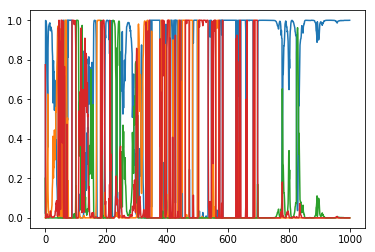

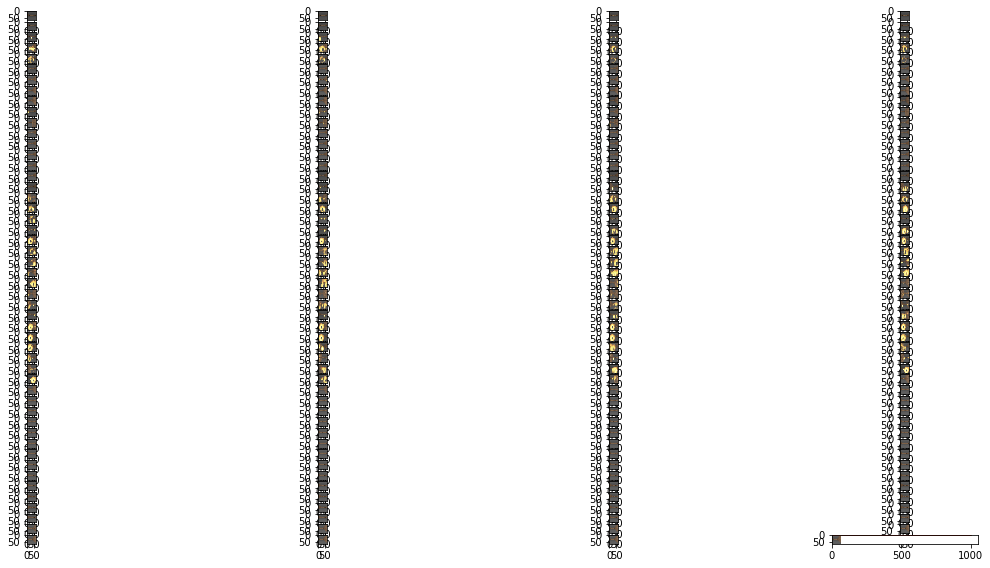

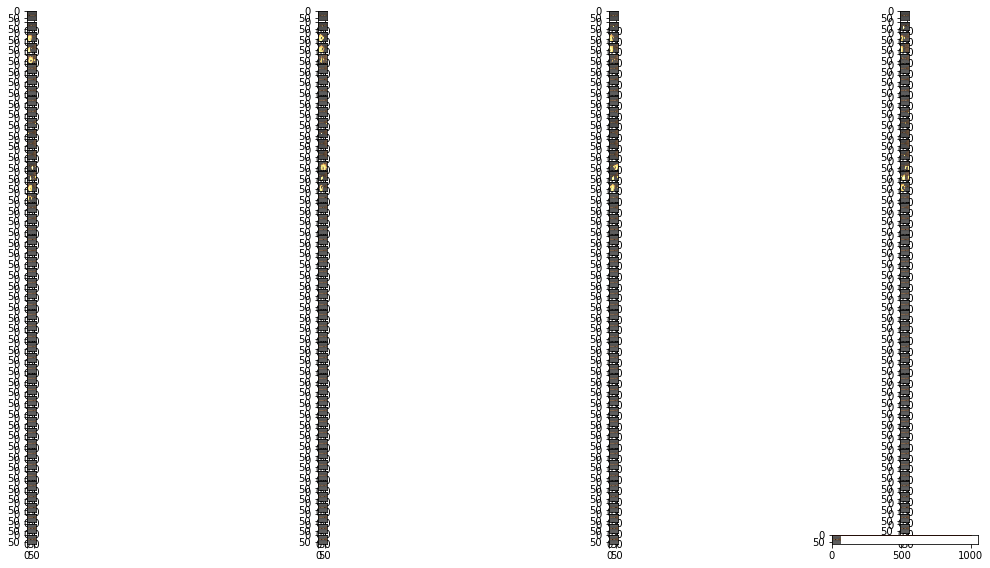

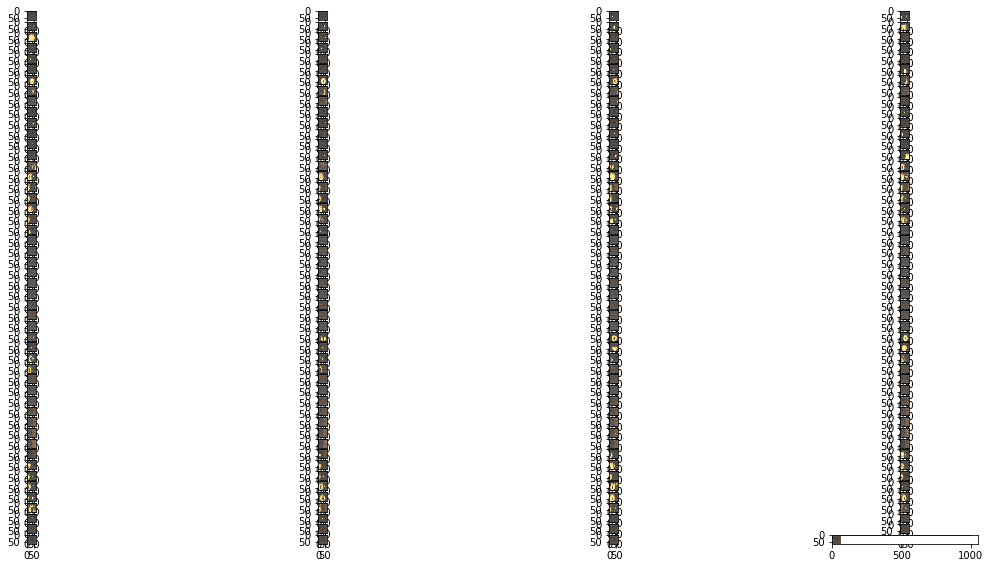

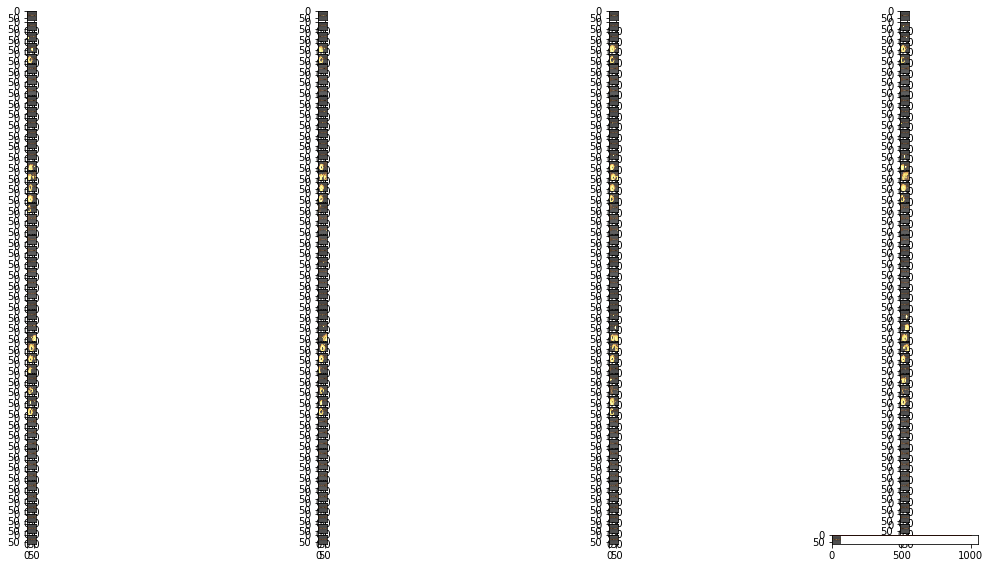

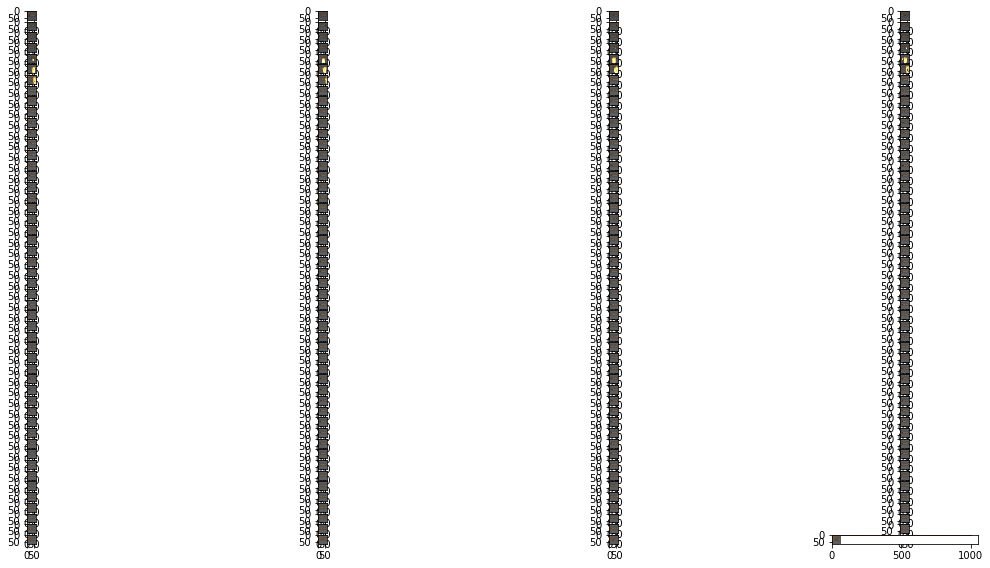

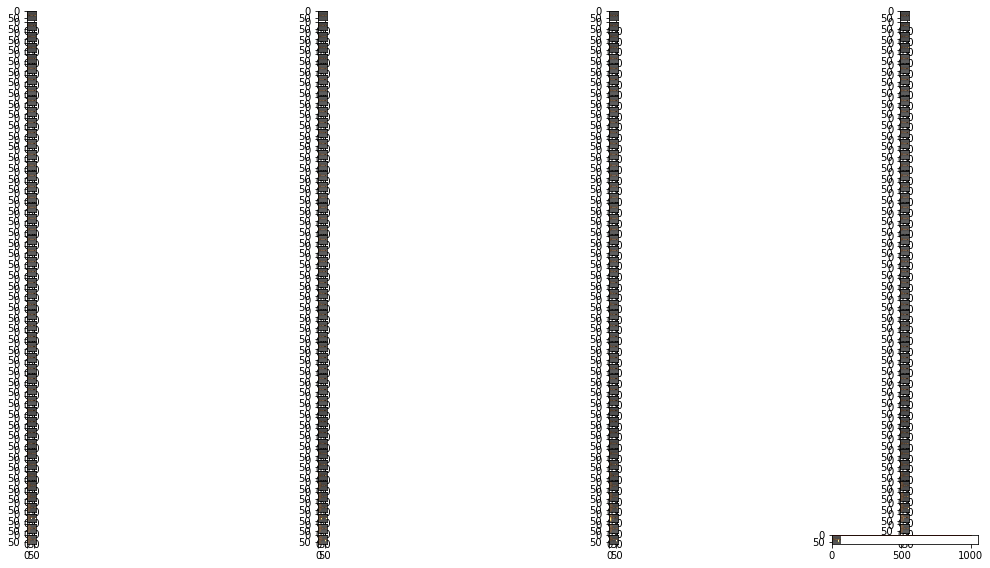

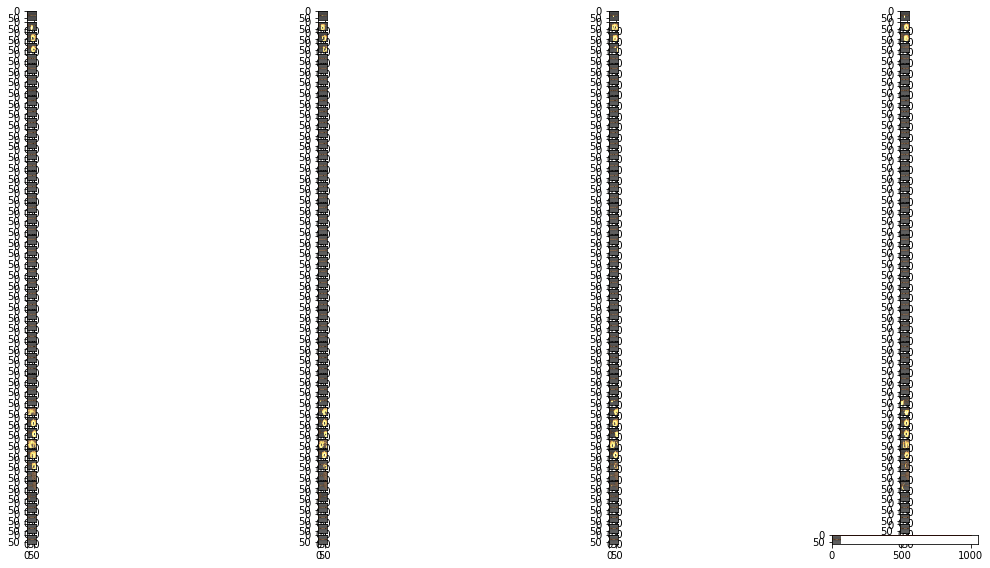

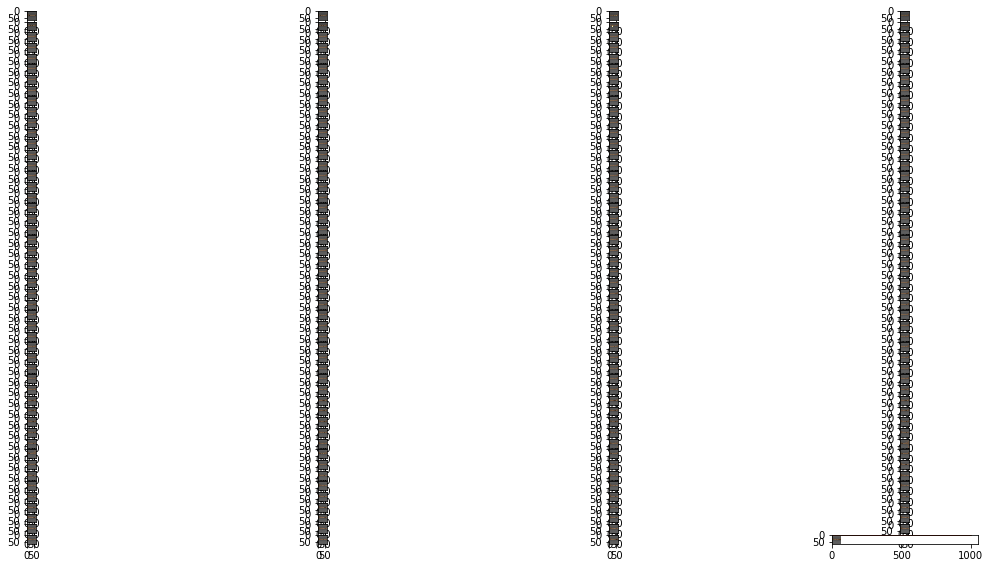

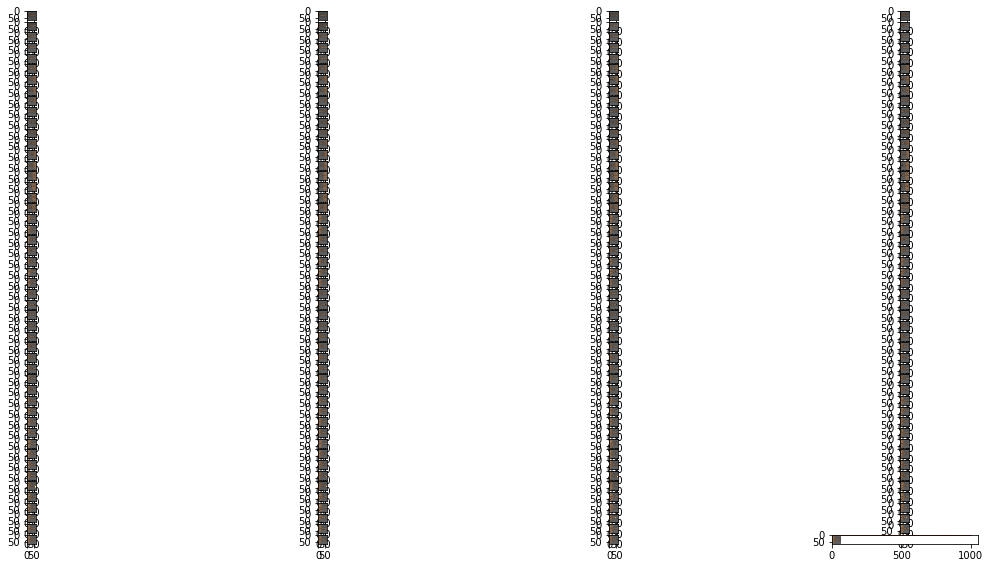

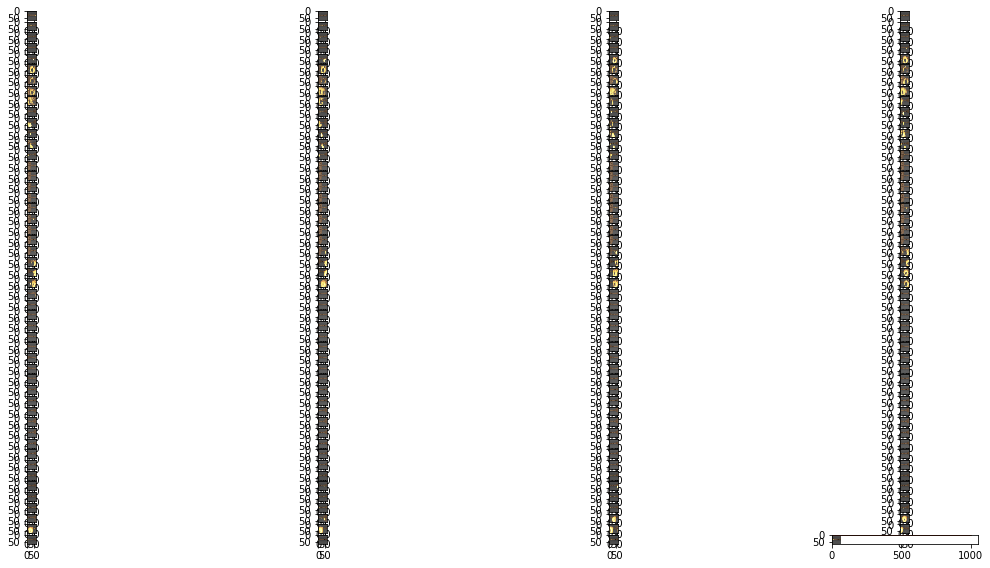

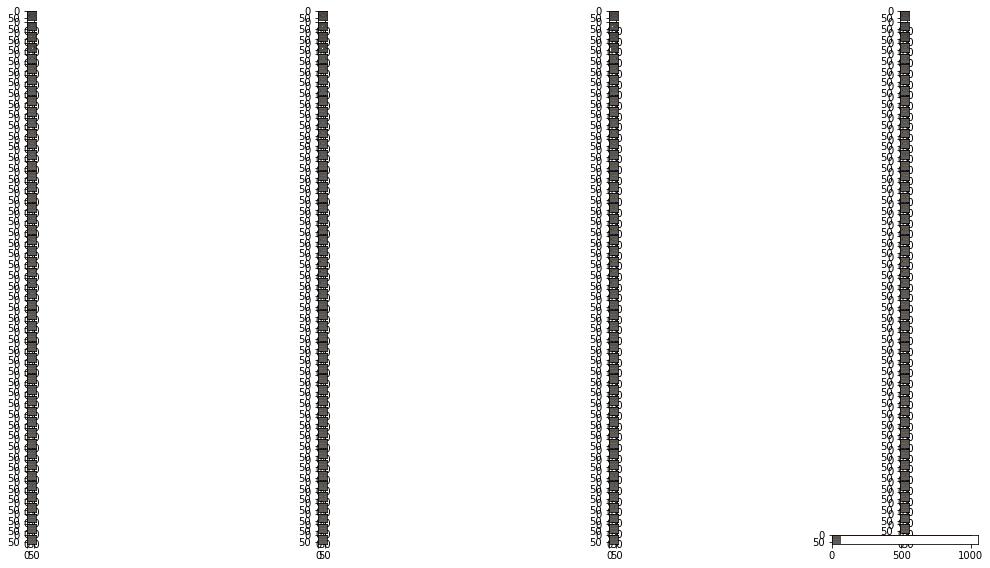

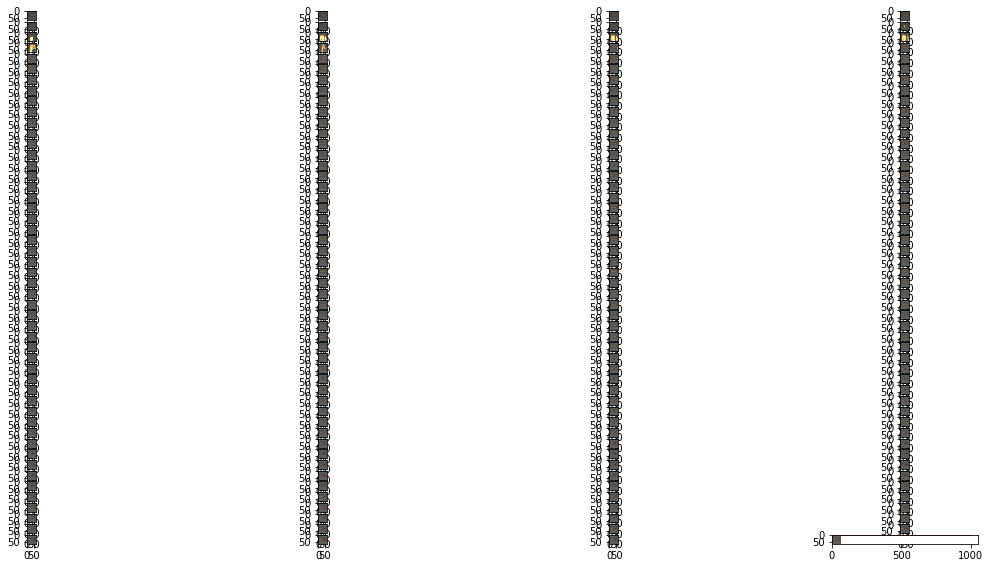

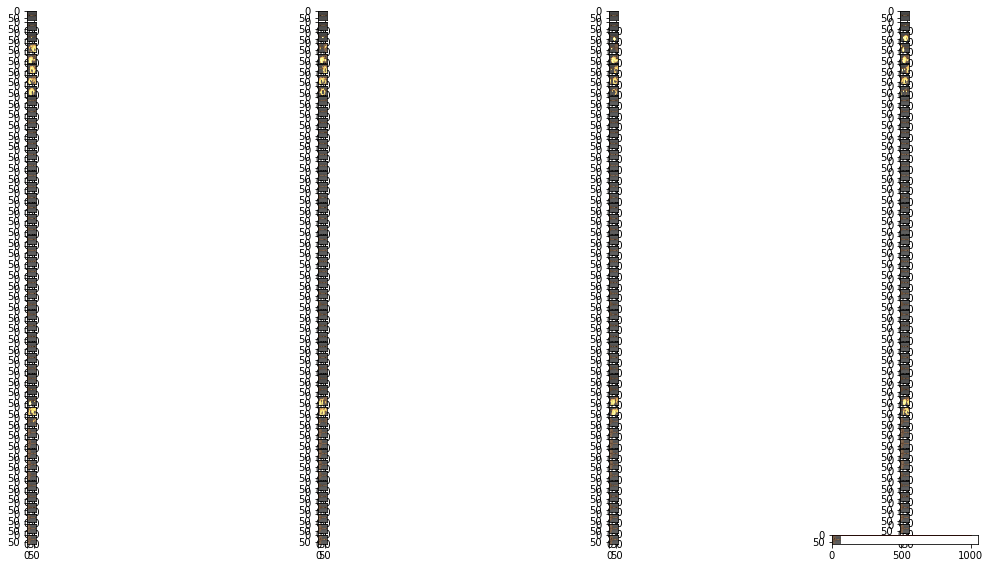

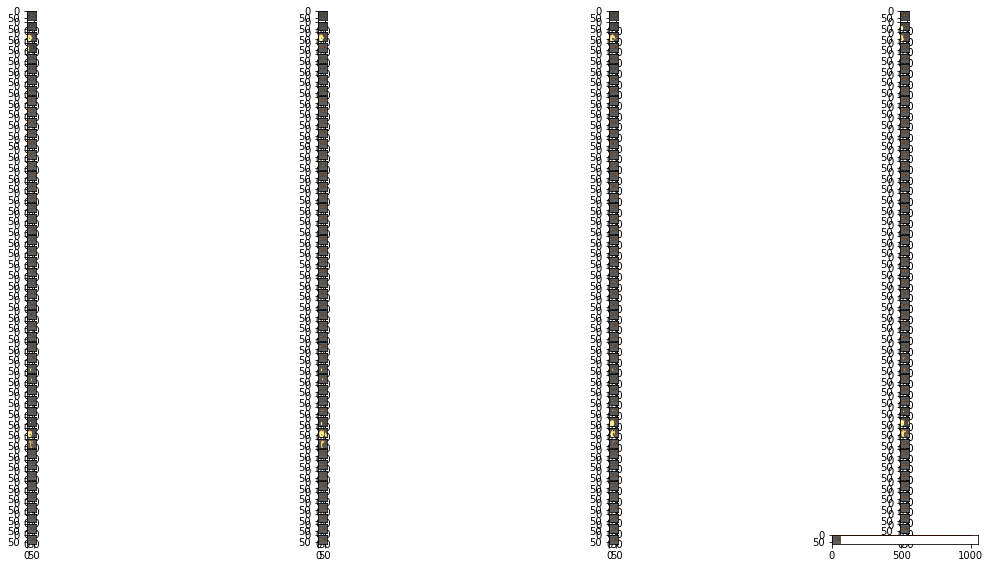

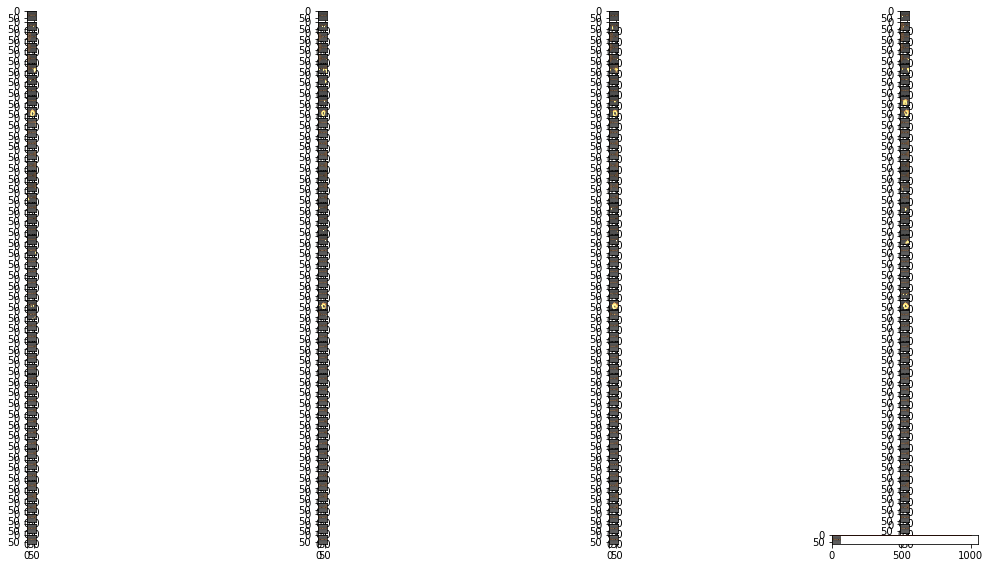

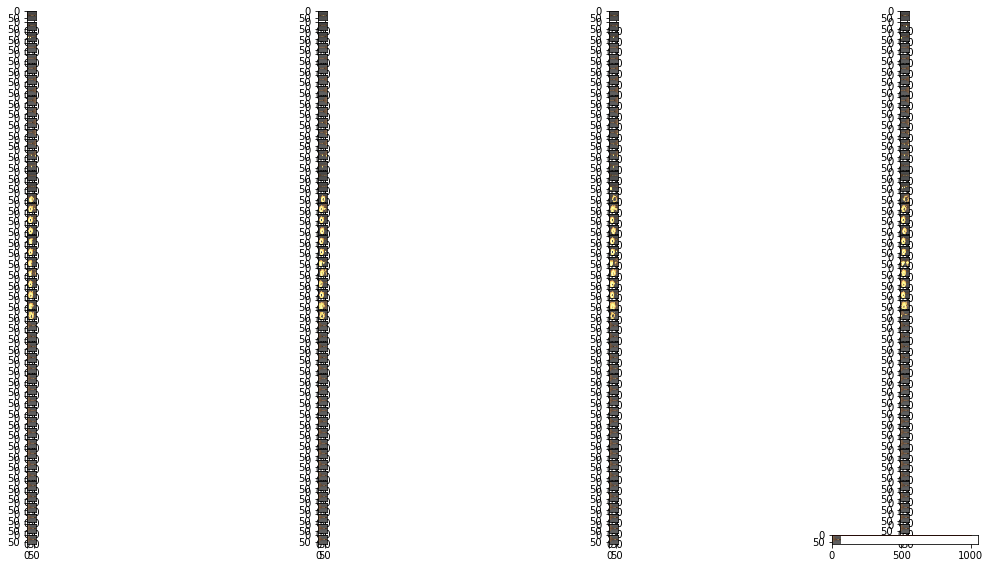

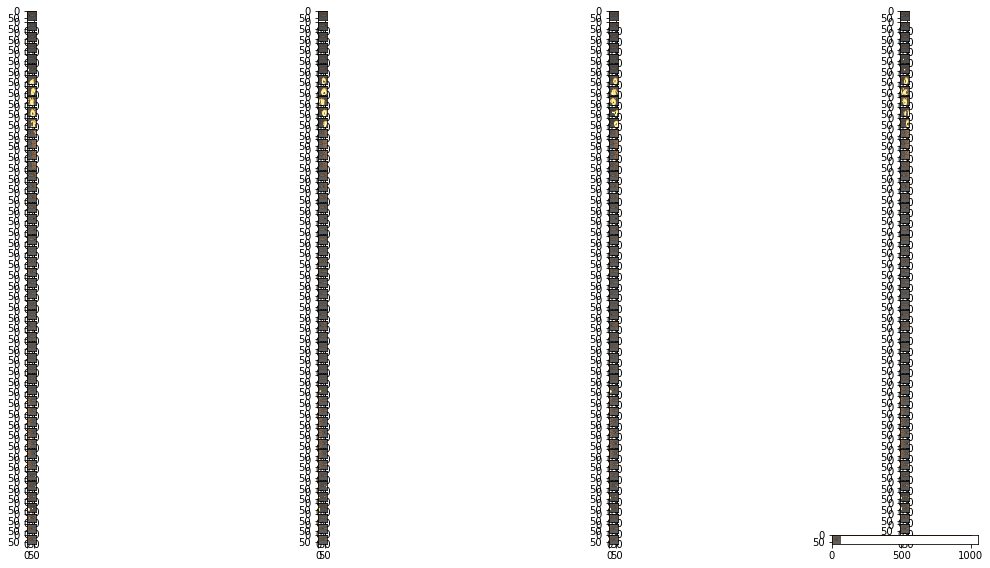

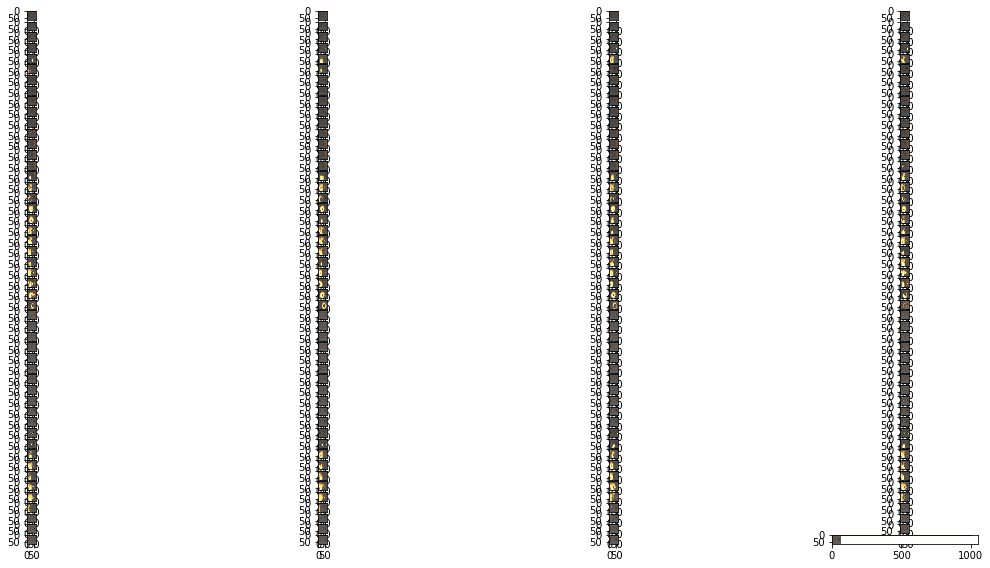

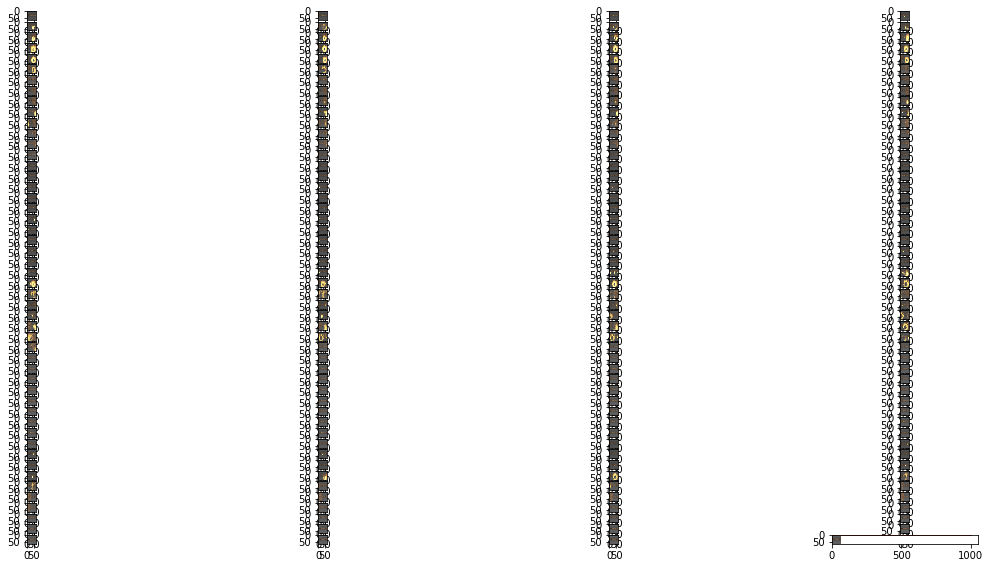

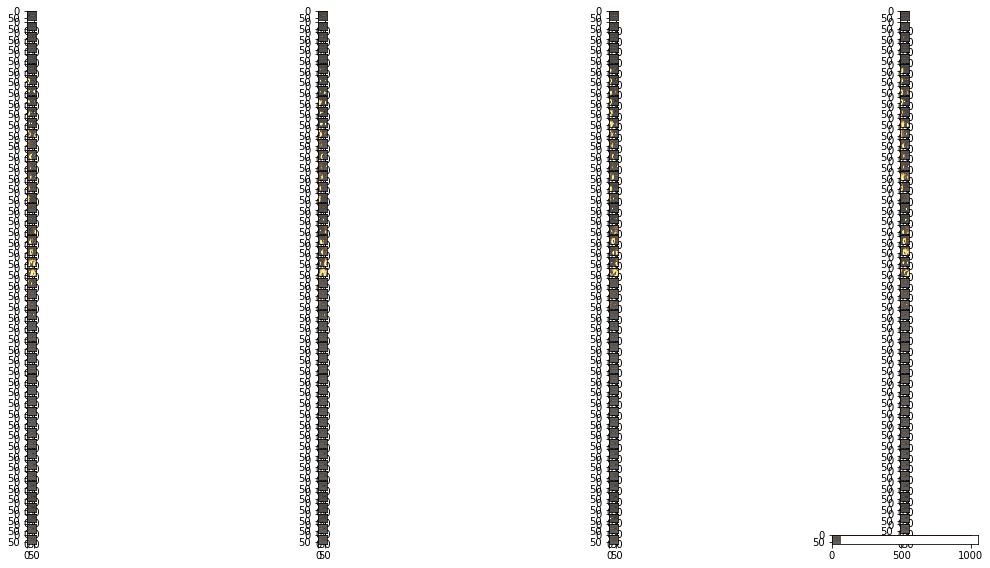

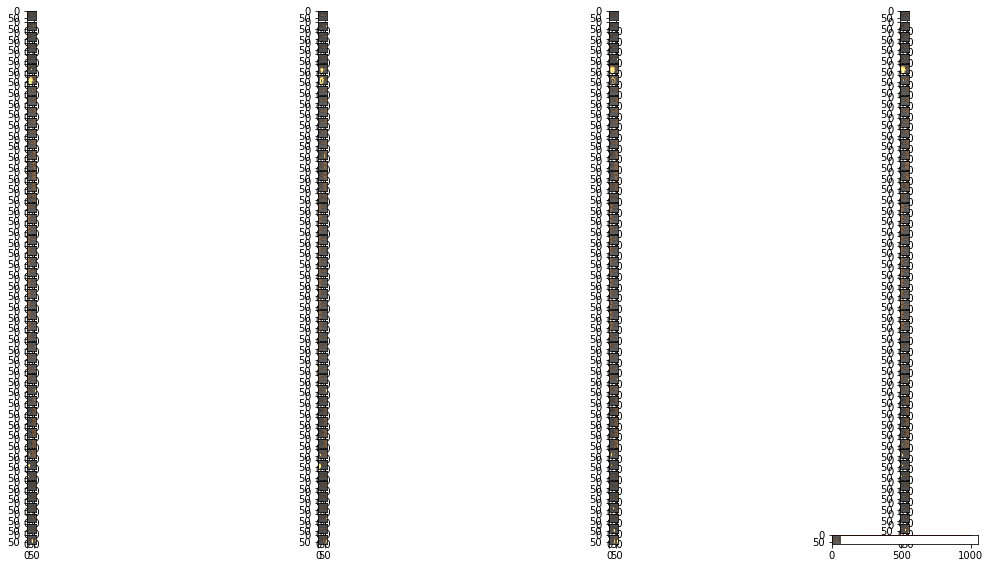

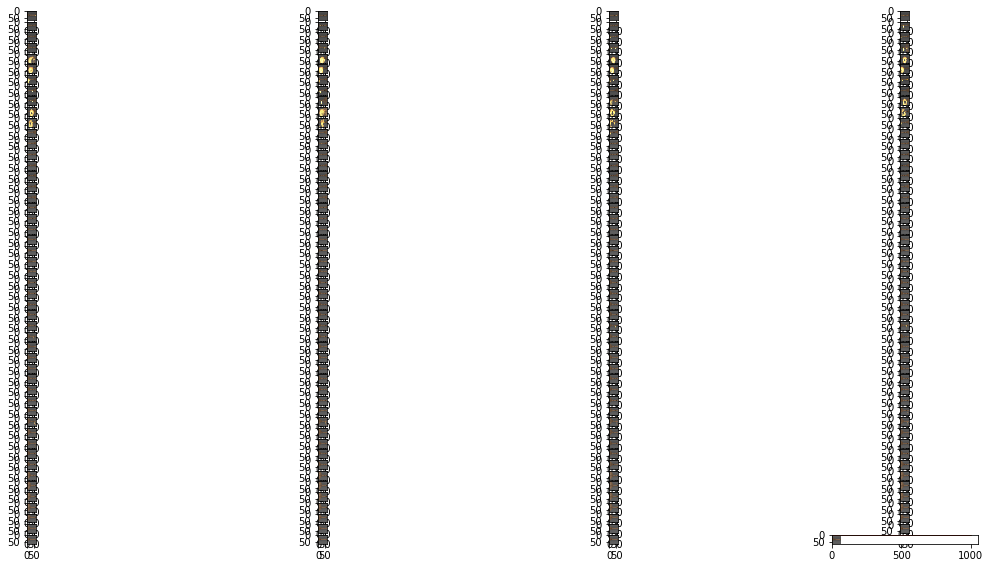

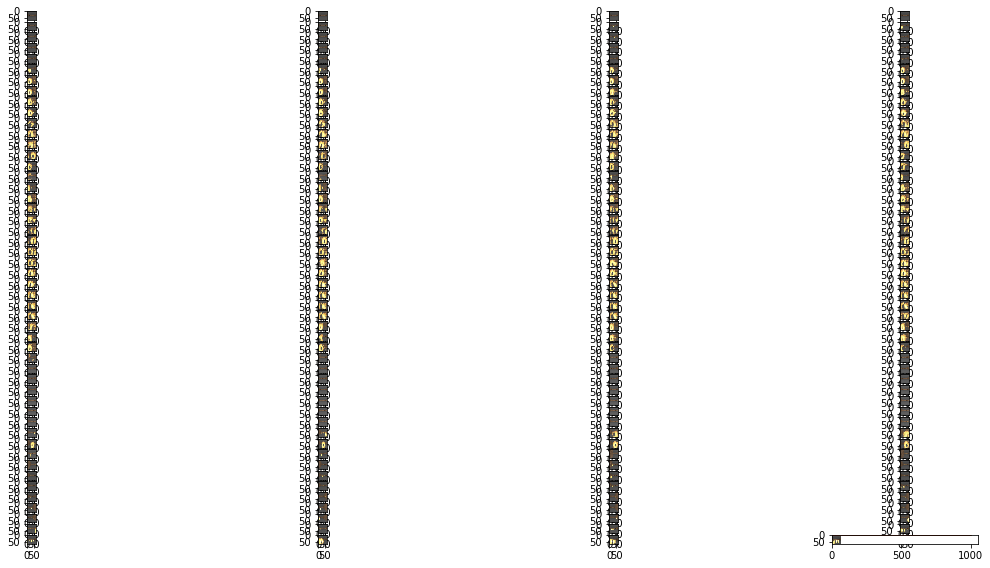

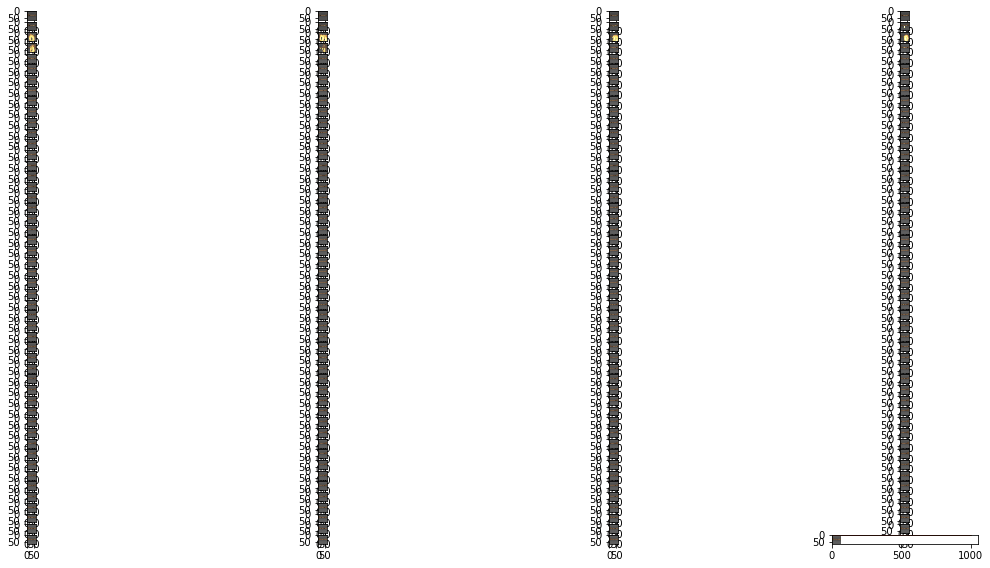

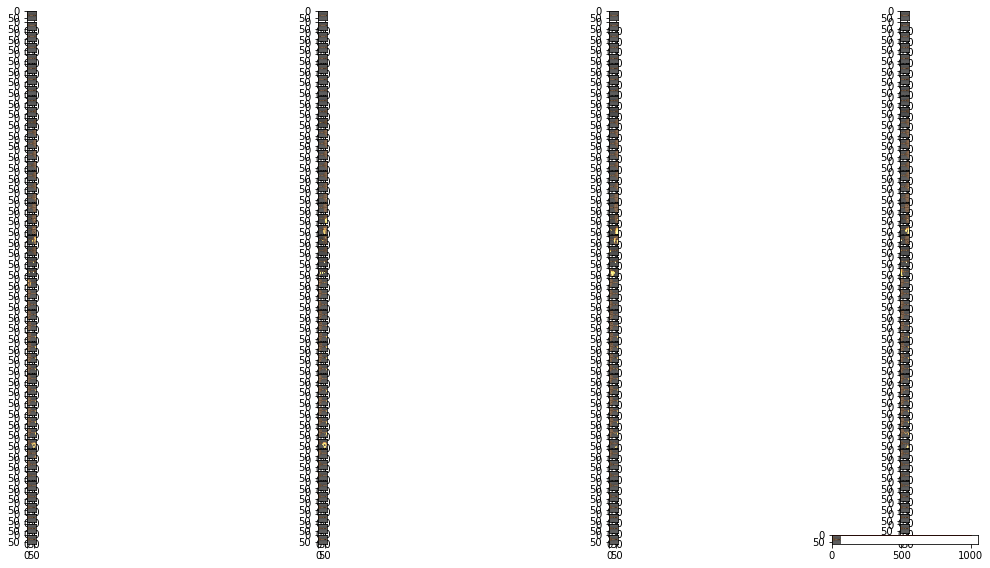

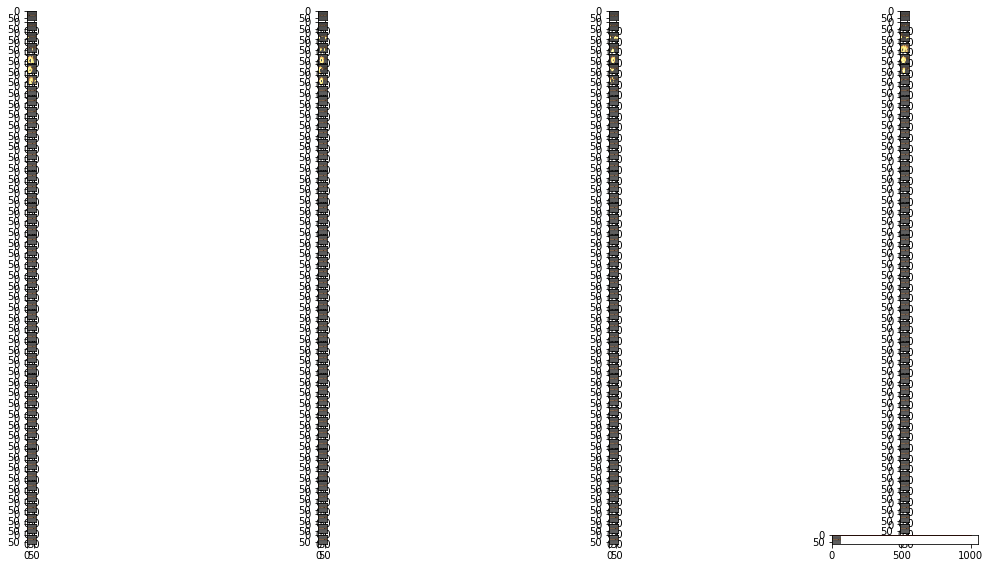

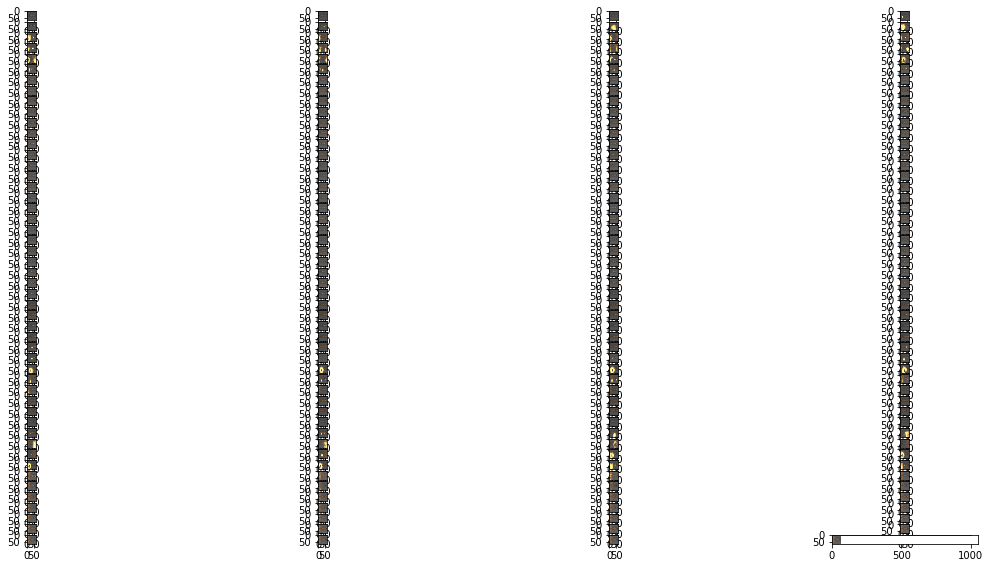

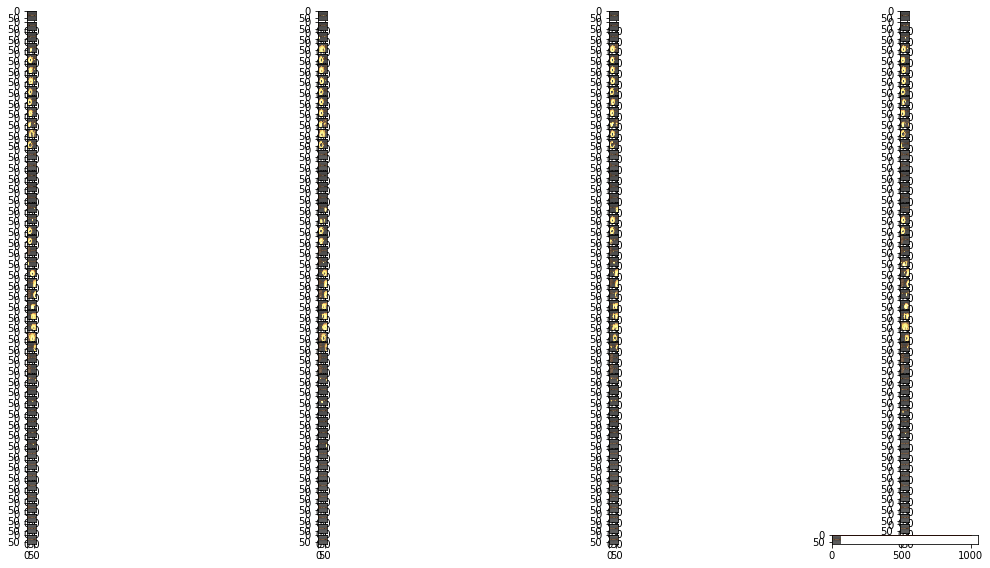

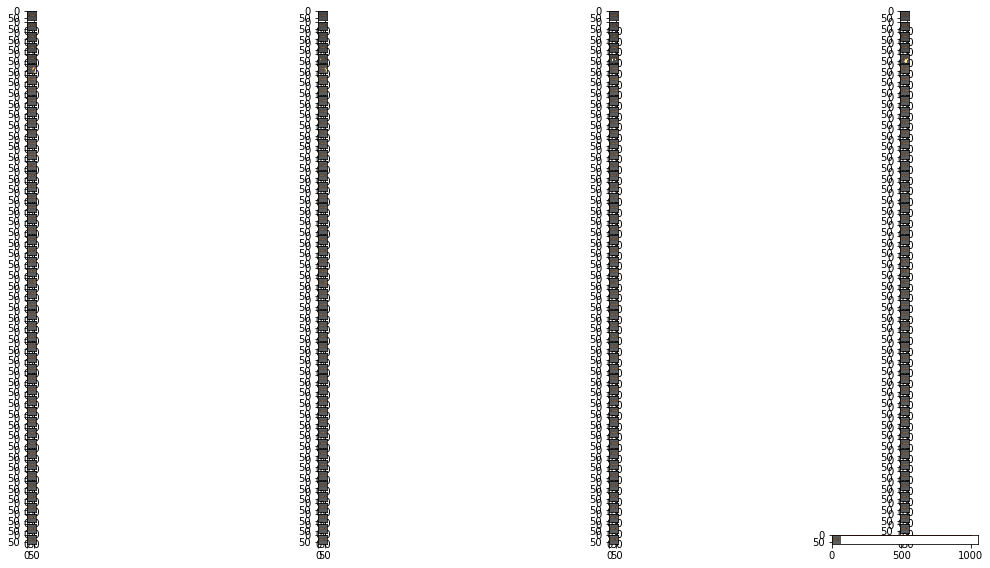

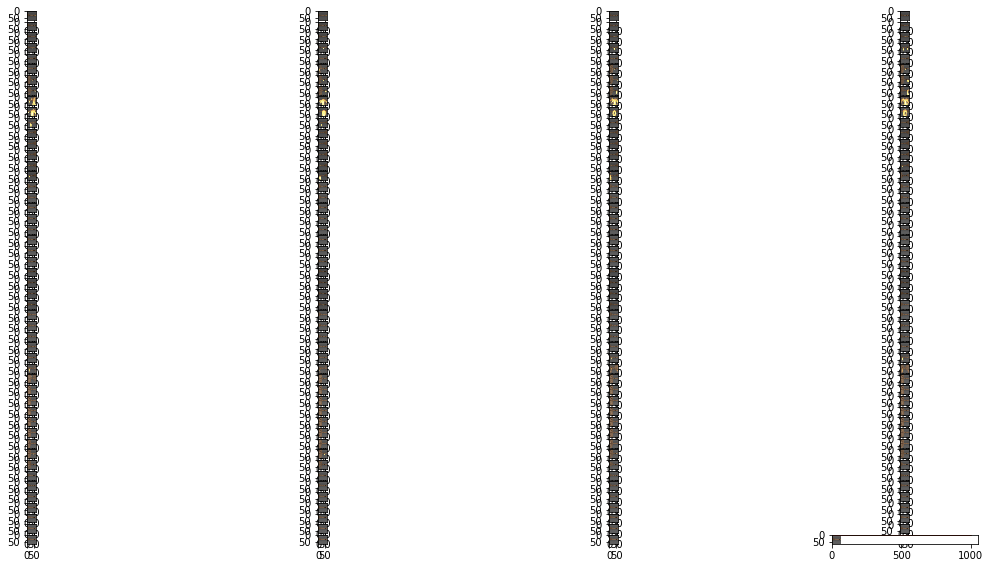

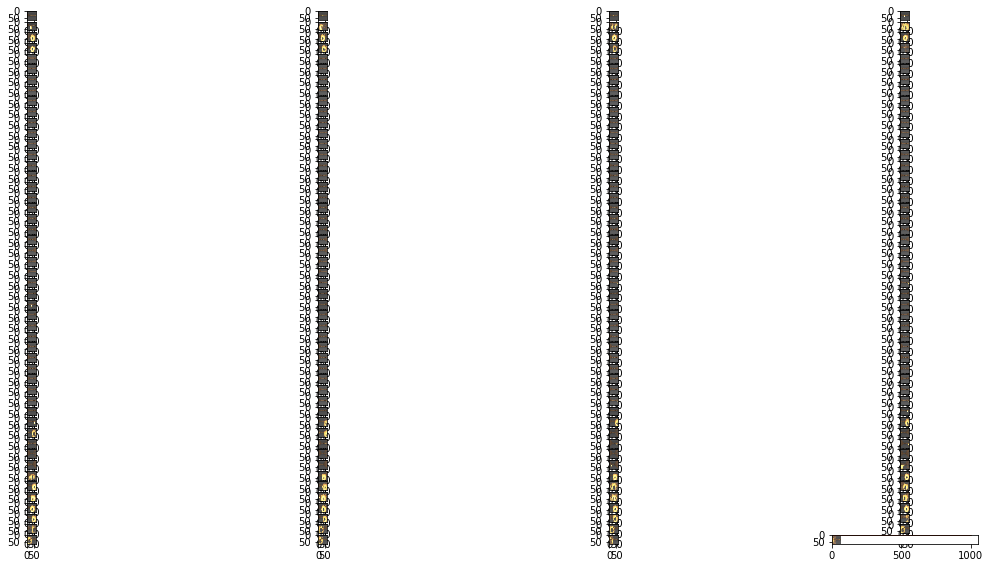

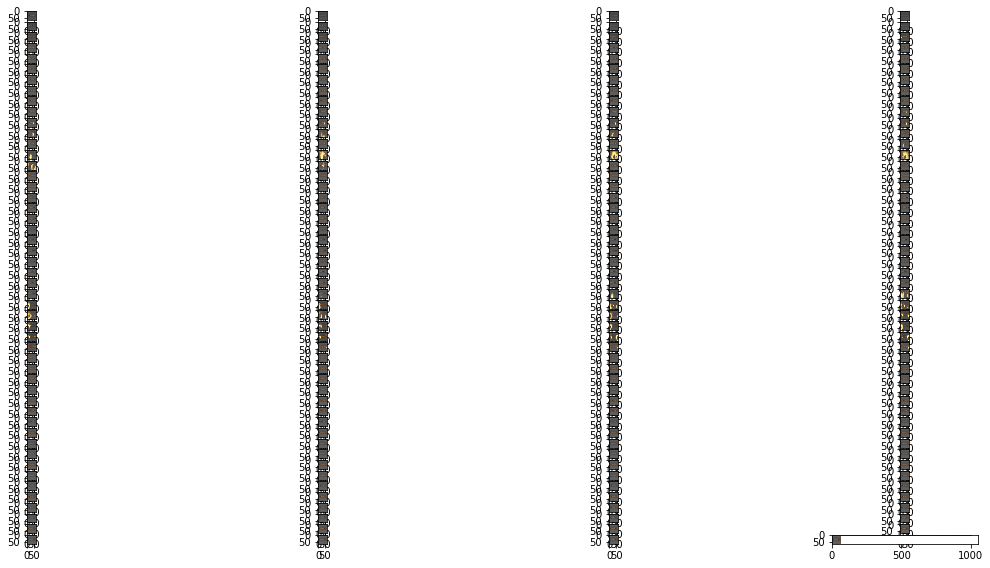

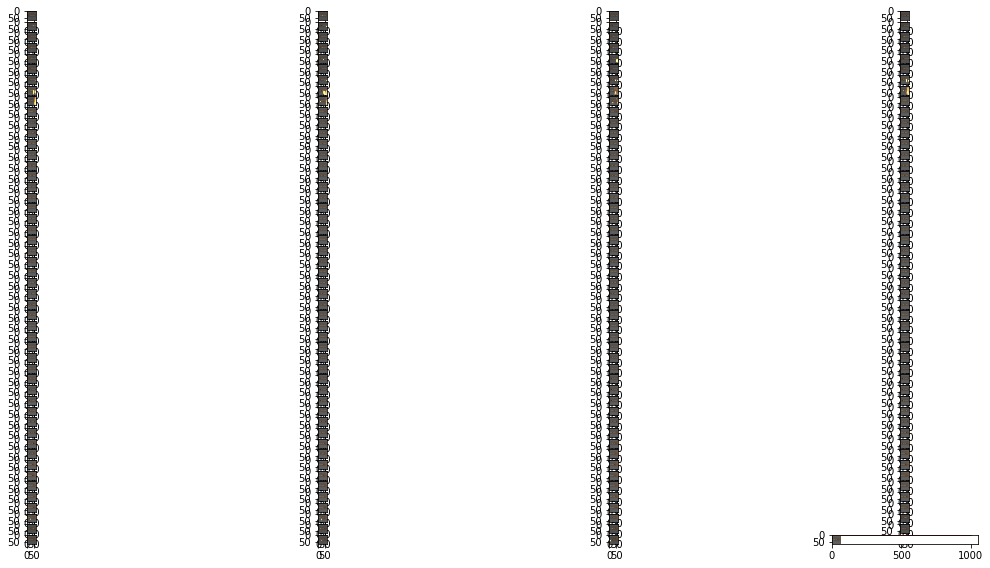

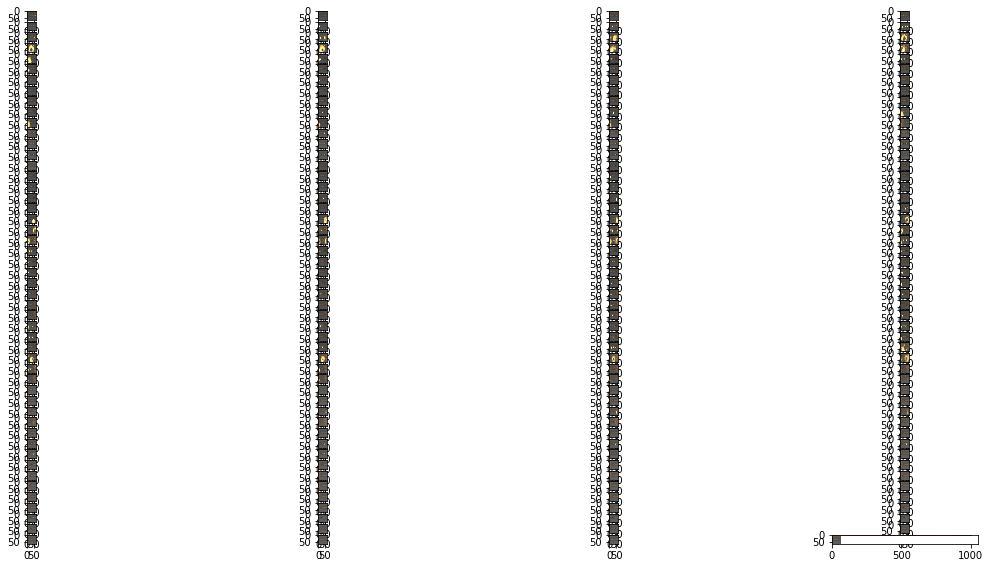

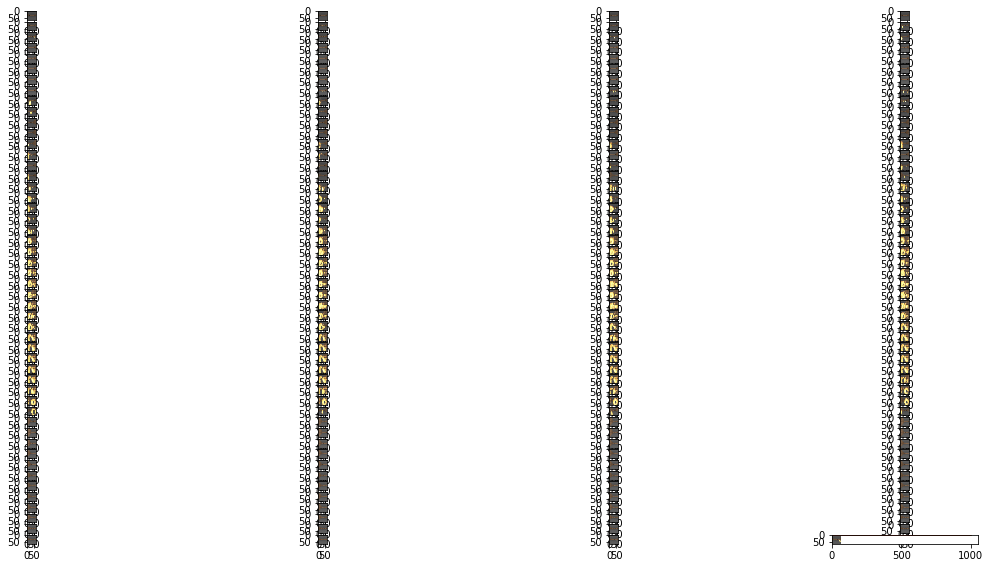

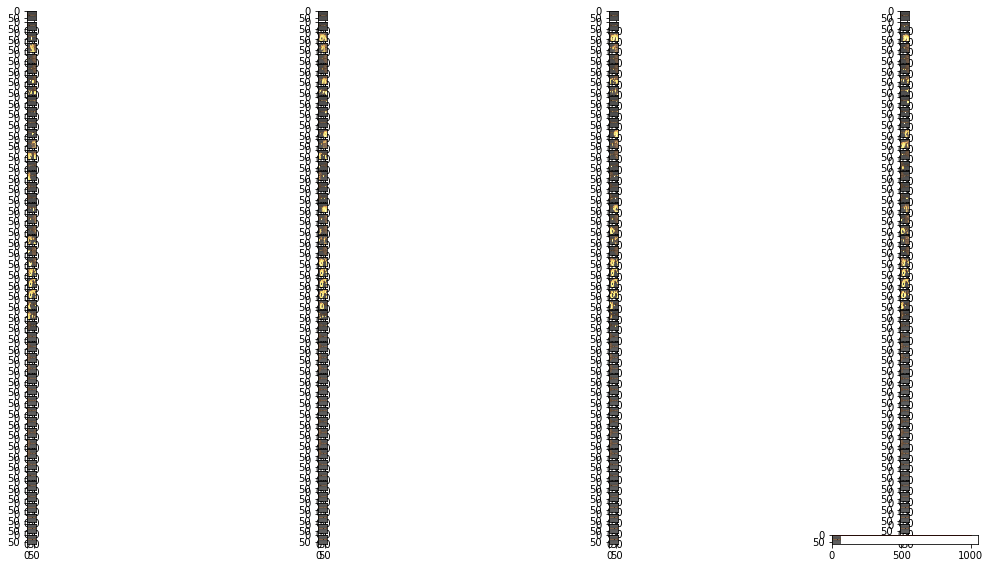

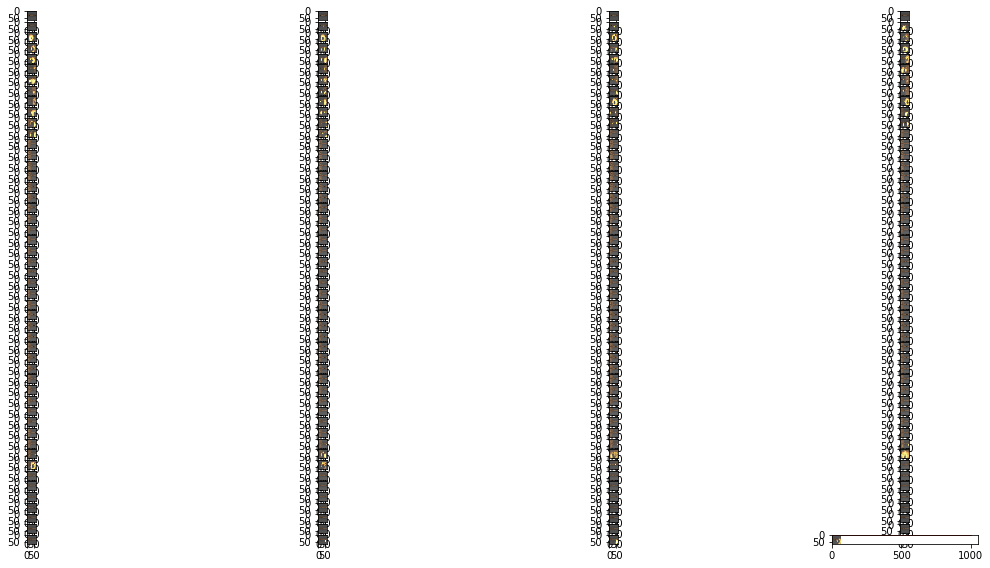

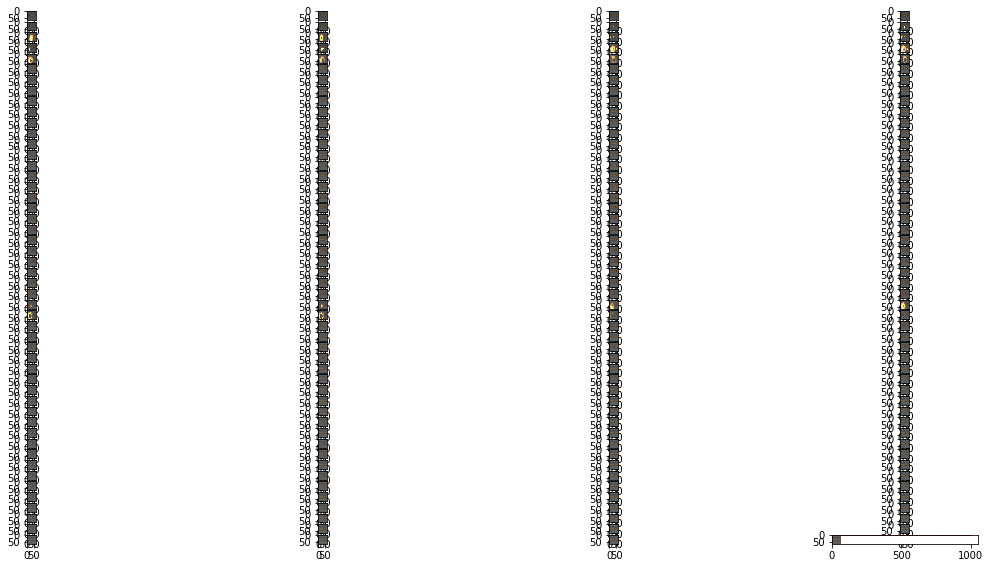

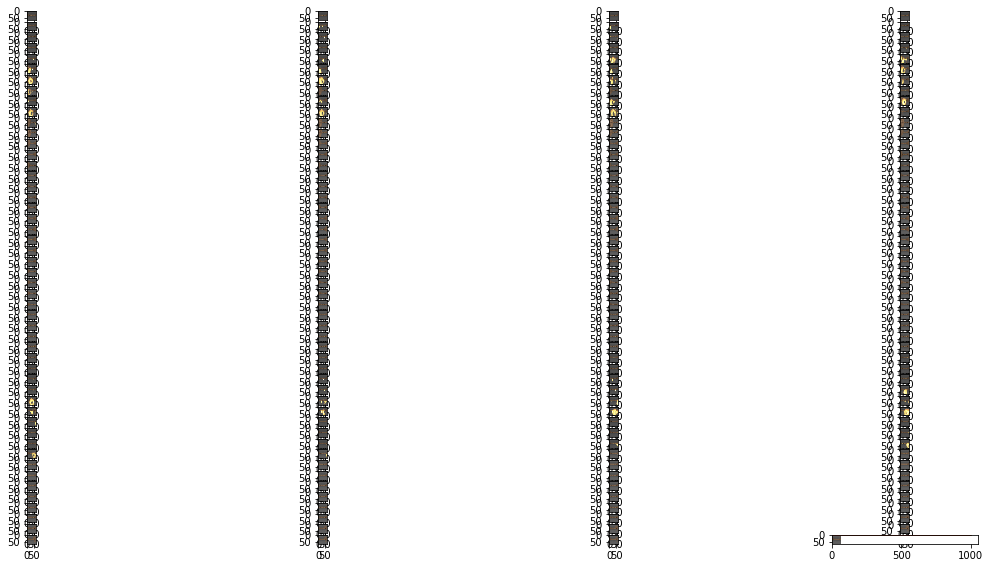

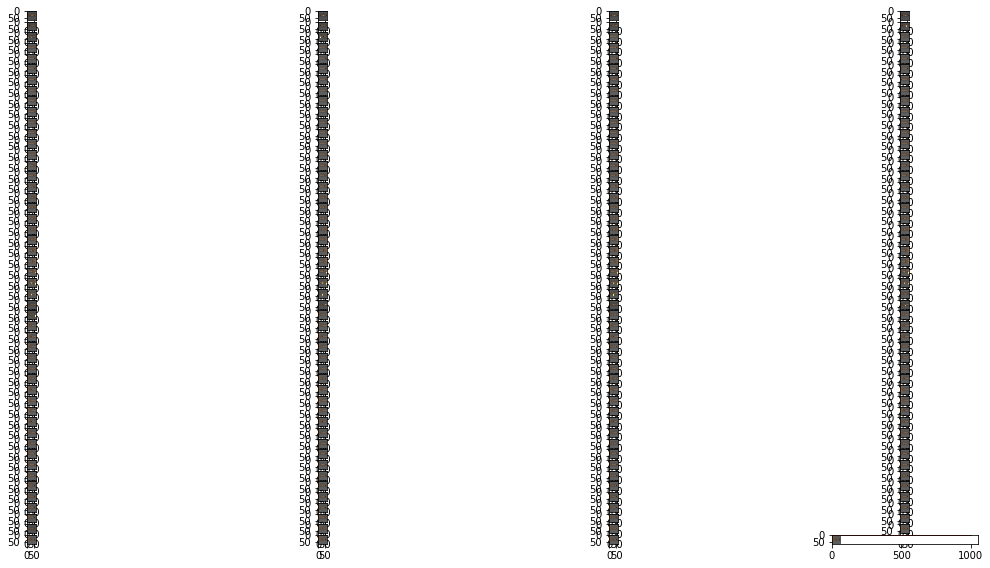

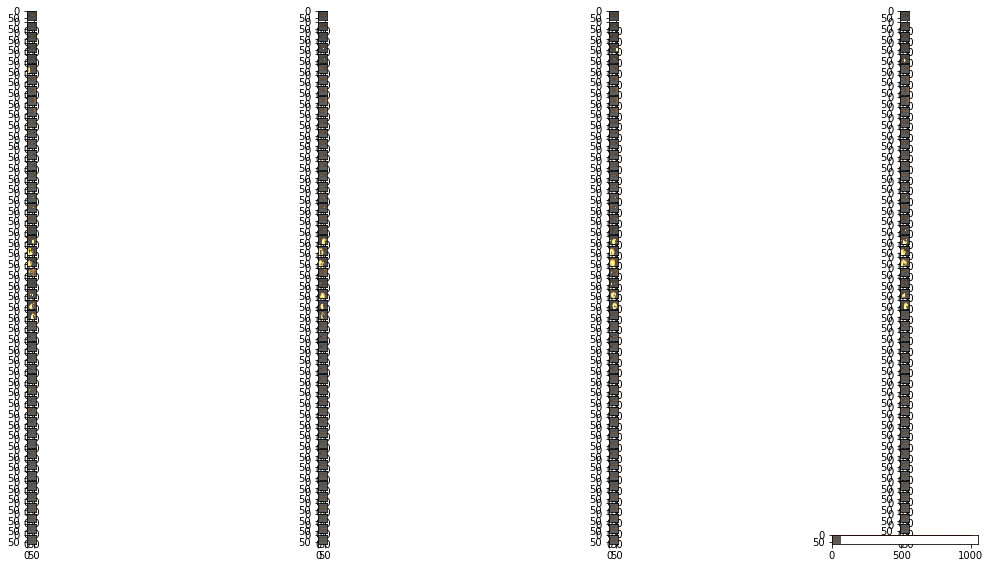

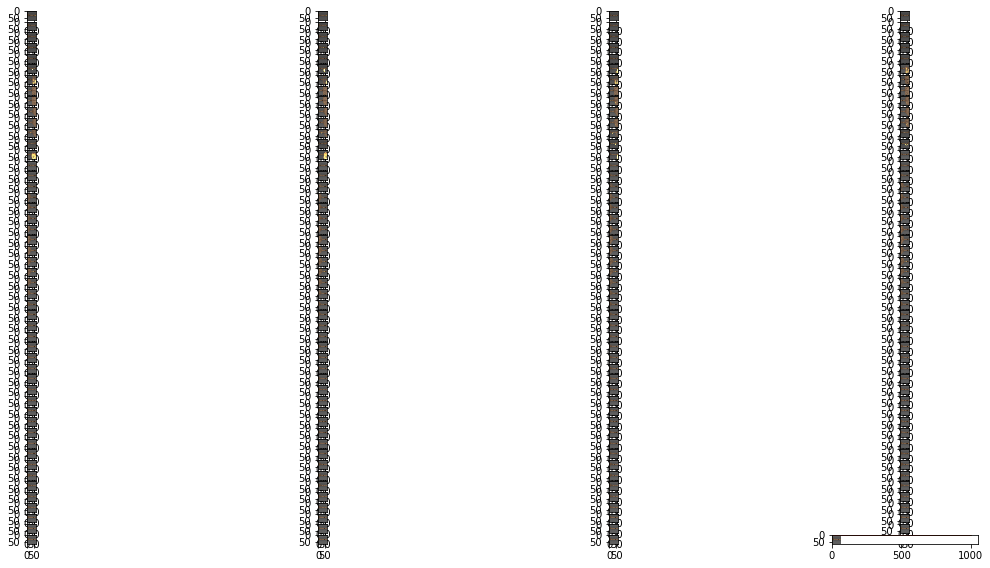

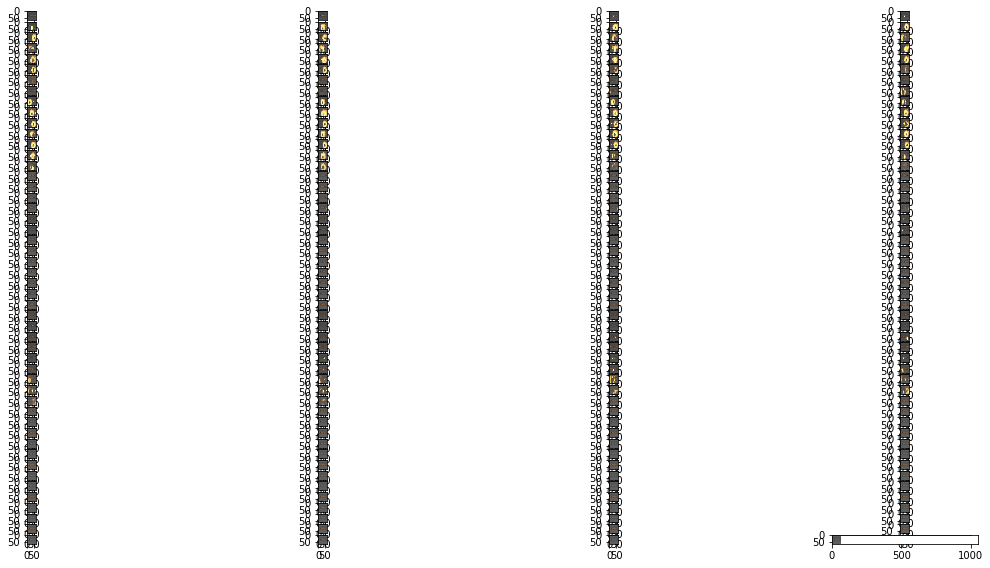

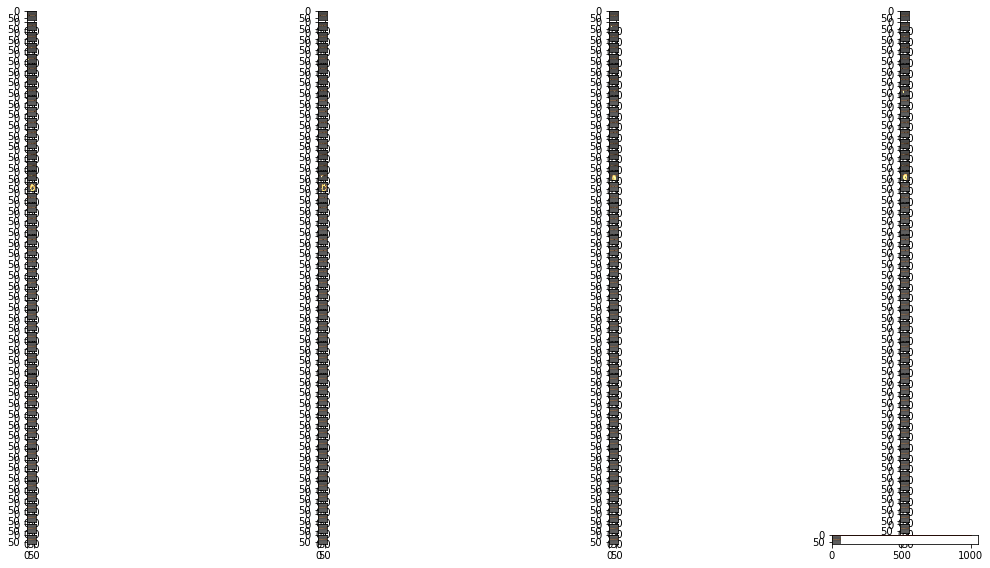

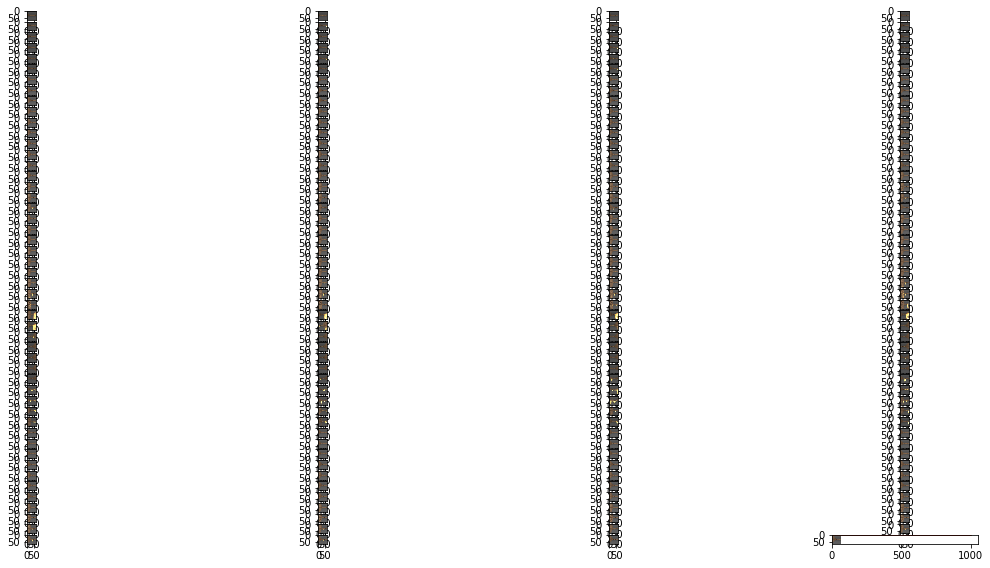

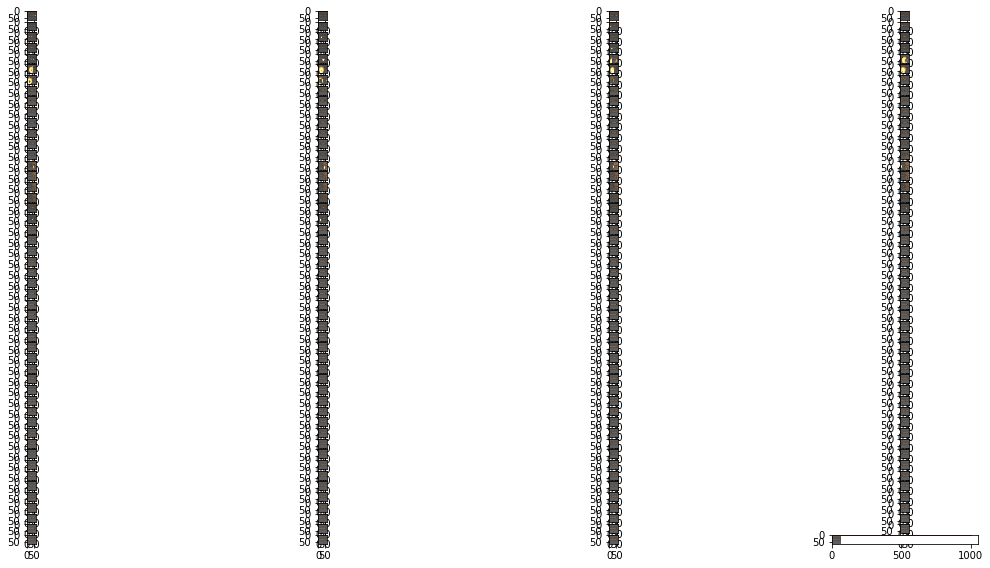

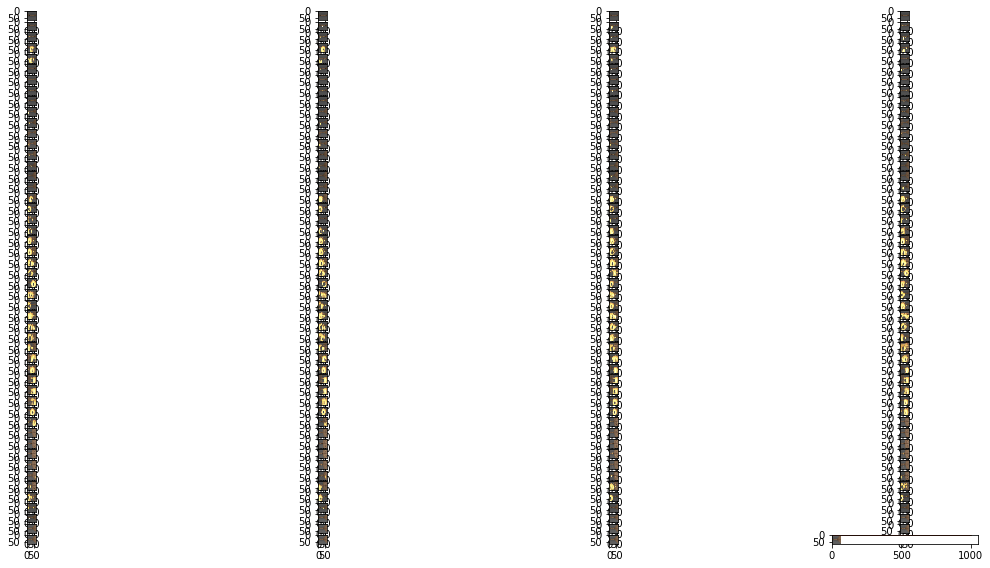

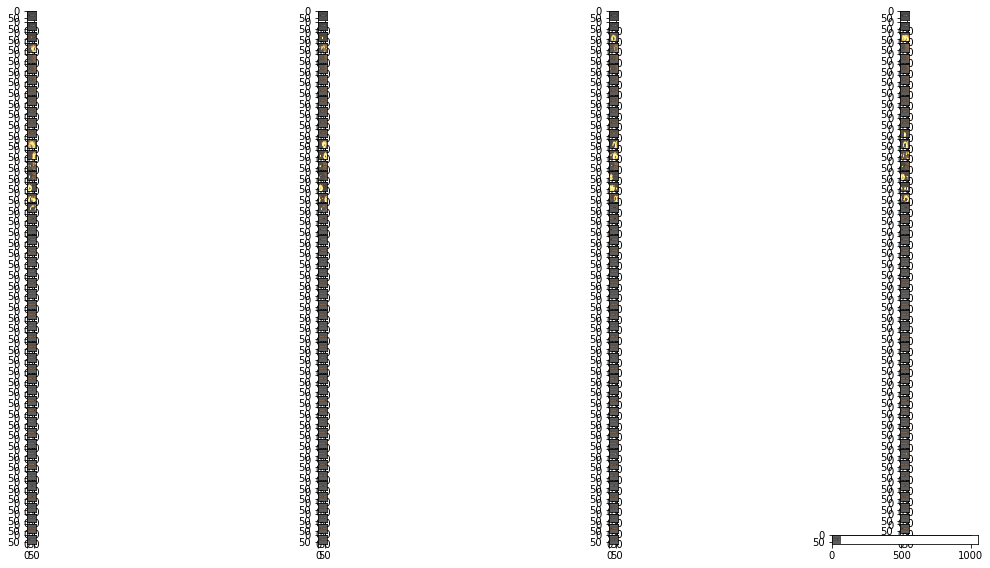

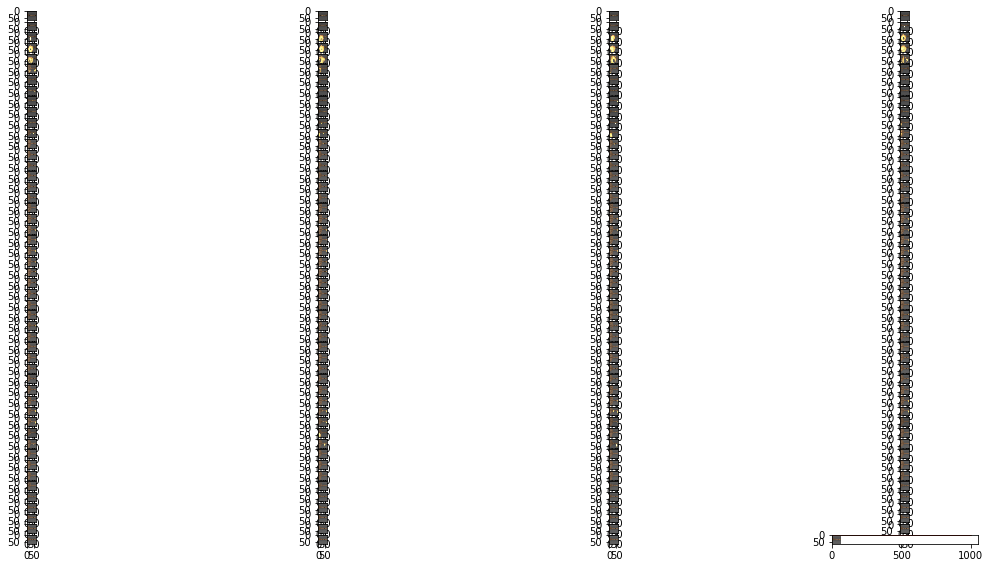

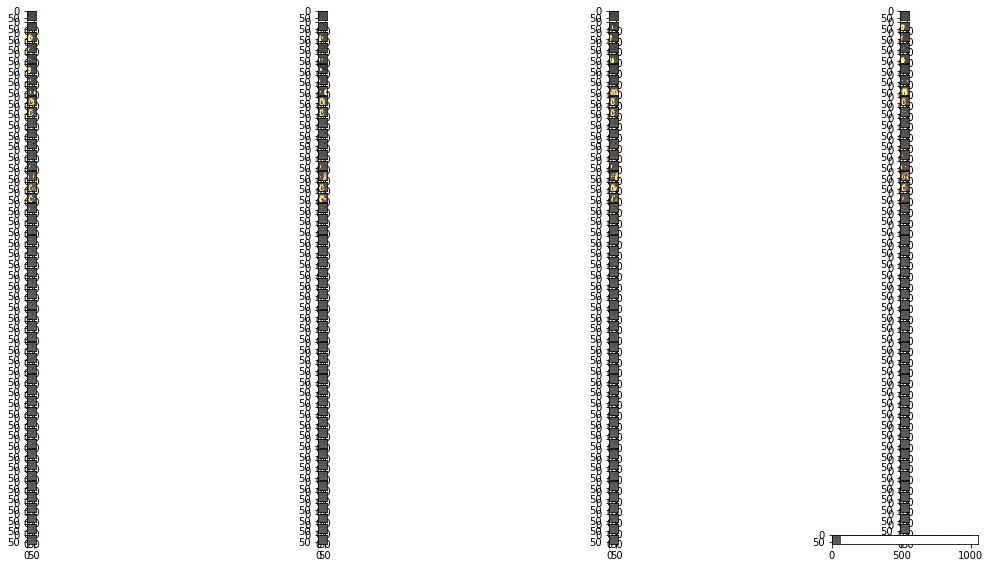

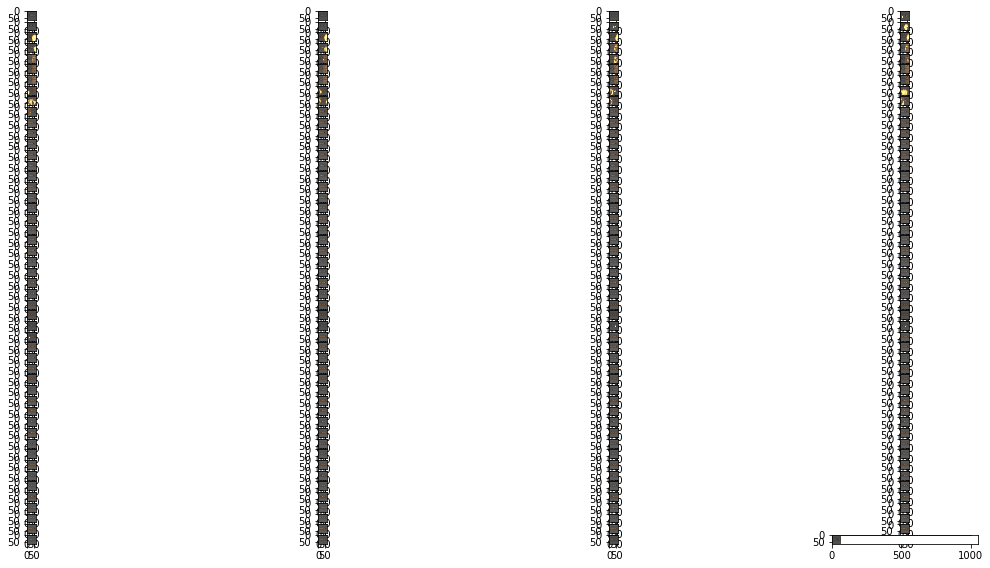

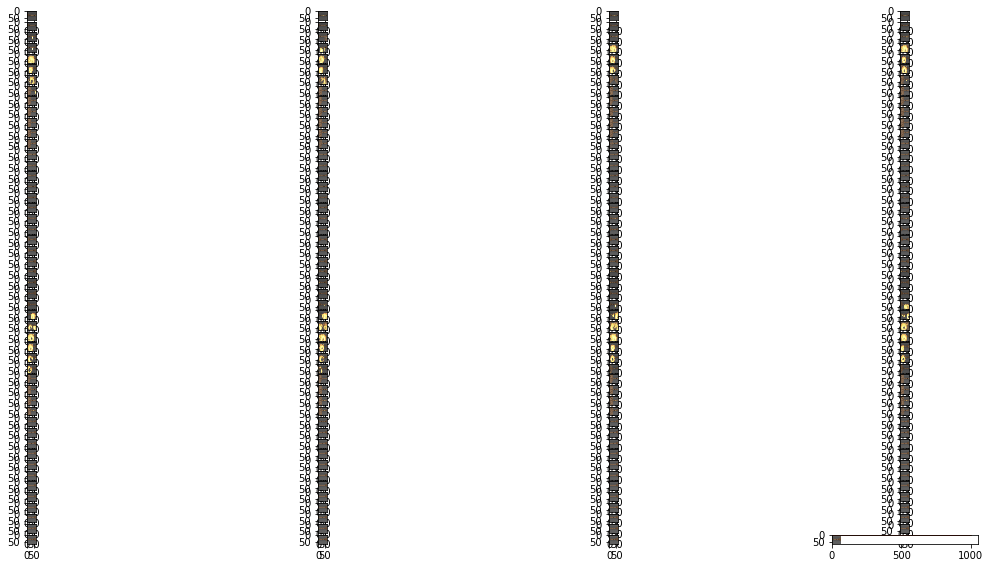

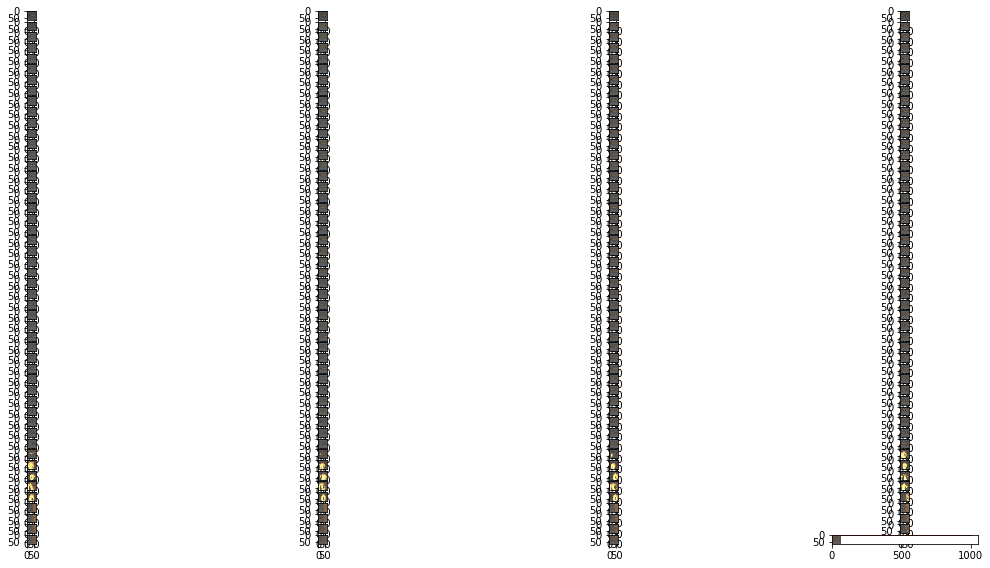

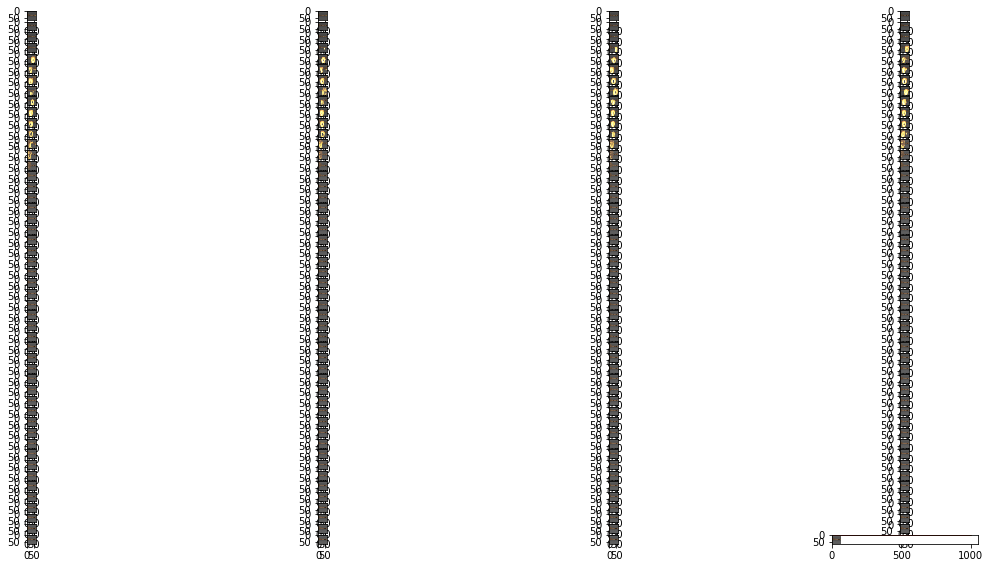

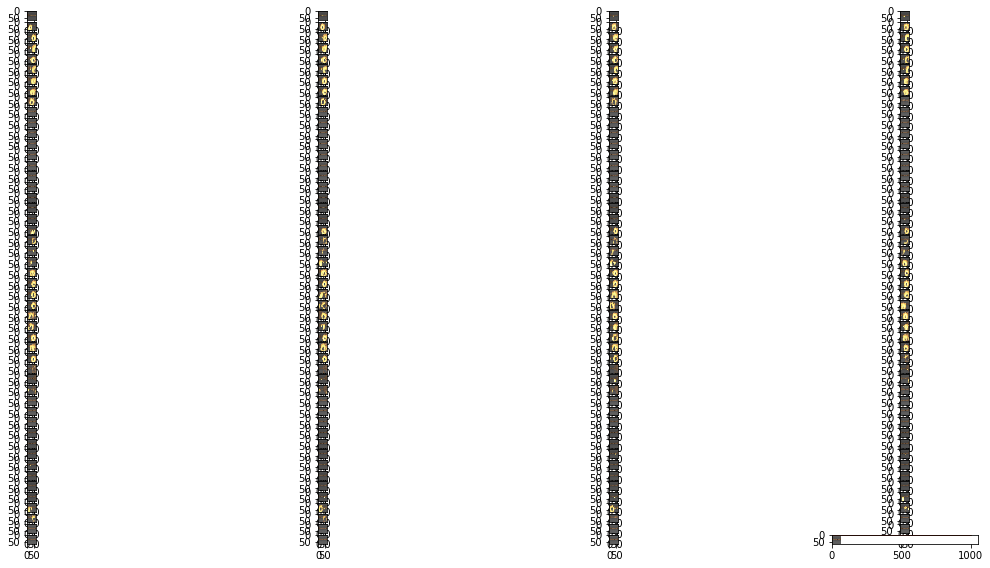

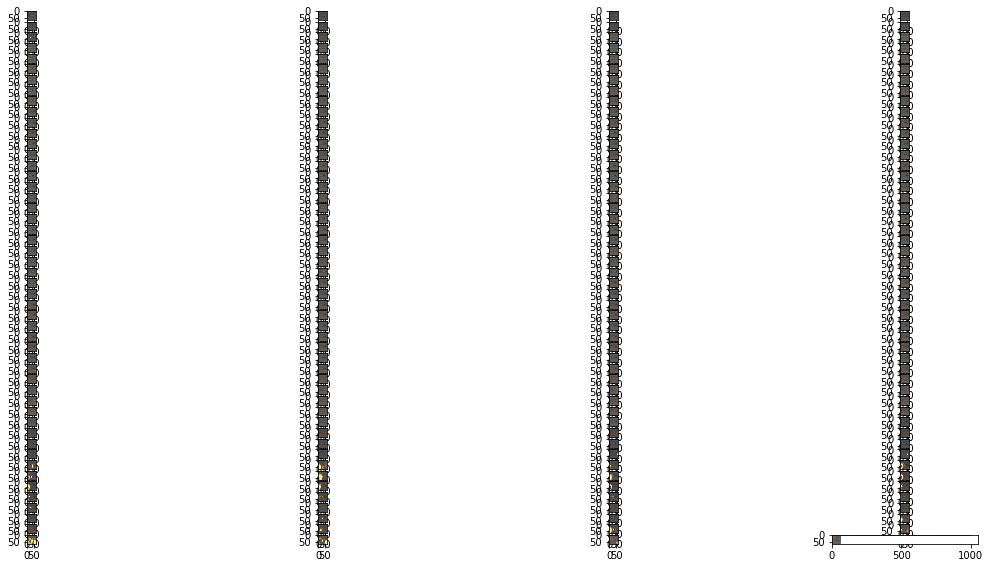

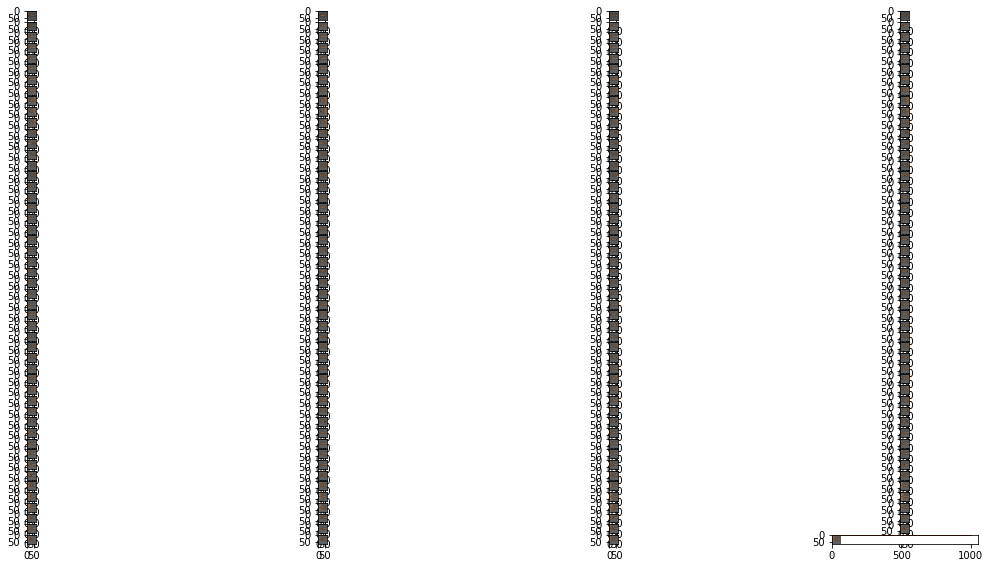

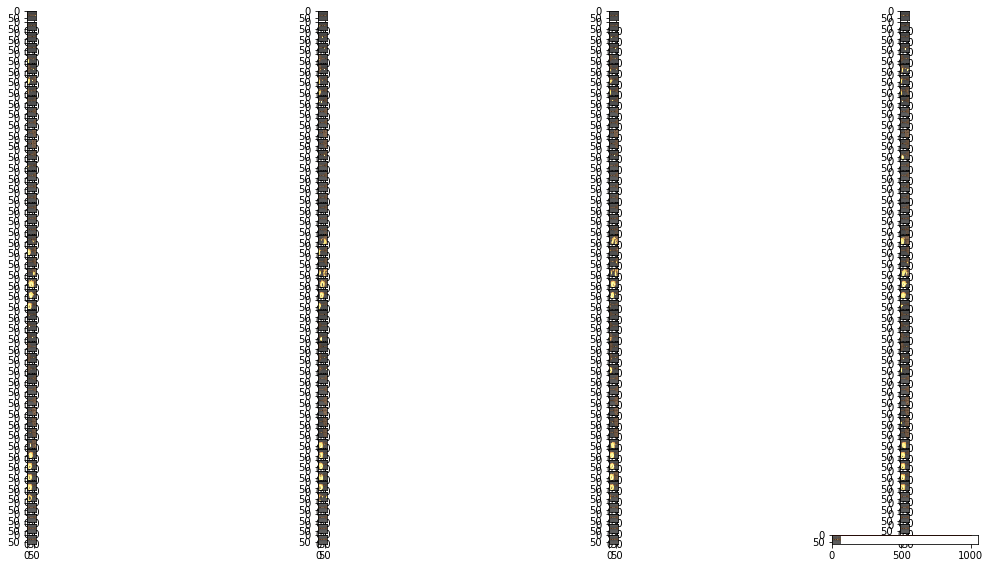

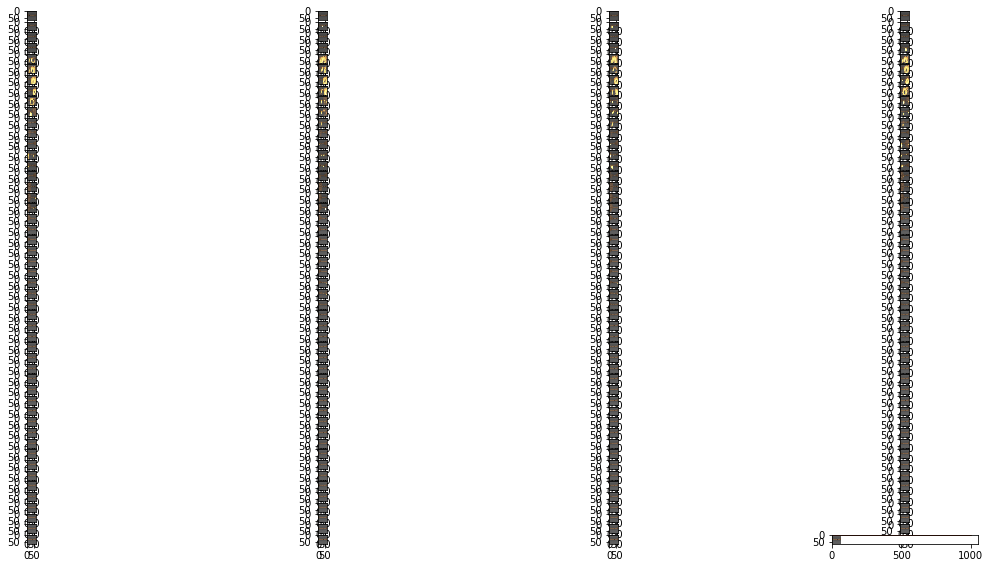

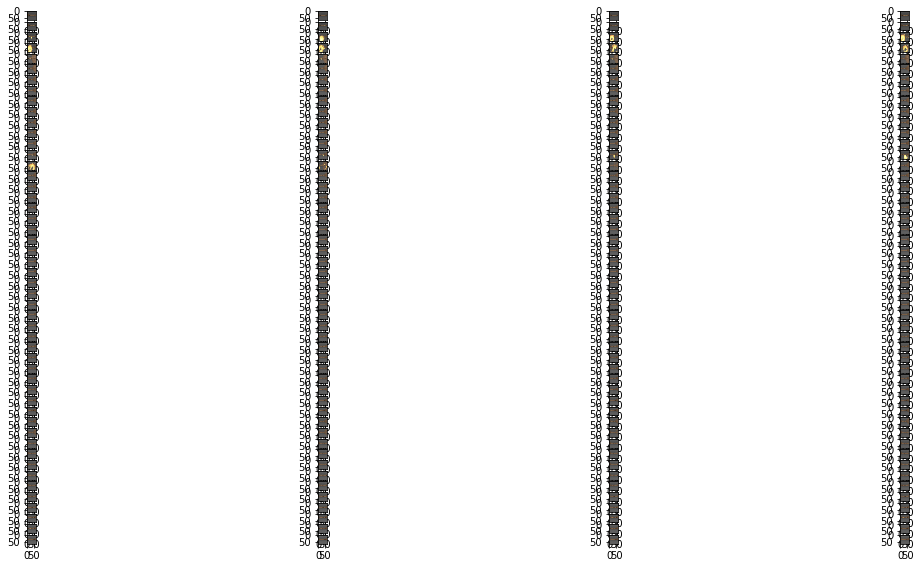

In [92]:
import pandas as pd
event_to_mixture_summary = []
main_mixture_summary = []
summary_num_events_handled_by_each_mixture = []
STATISTICAL_REPETITIONS = 5
SEQUENCE_LENGTH = 1000
for rep in range(STATISTICAL_REPETITIONS):
    for num_mixtures, rnn_model_list in rnn_analyzers.items():
        print(num_mixtures)
        if num_mixtures!=4:
            continue #Sticking to 4 now.
        for model in rnn_model_list:
            event_to_mixture, mixture_to_event, main_mixture = measure_dominating_mixture_for_events(model, 1000)
            event_to_mixture_summary.append(event_to_mixture)
            main_mixture_summary.append(main_mixture)
            num_events_handled_by_each_mixture={}
            for mixture, events in mixture_to_event.items():
                num_events_handled_by_each_mixture[mixture] = len(events)
            summary_num_events_handled_by_each_mixture.append(num_events_handled_by_each_mixture)
    
events_dataframe = pd.DataFrame(event_to_mixture_summary)
mixture_summary_dataframe = pd.DataFrame(main_mixture_summary)
summary_num_events_dataframe = pd.DataFrame(summary_num_events_handled_by_each_mixture)

In [93]:
def count_events_in_main_vs_other_mixtures(events_dataframe, event_name, main_mixture_summary, summary_num_events_dataframe):
    #Helps analyze if one mixture typically takes responsability
    #for analyzing one specific event.
    
    #Counting how often the event is present in the most common mixture,
    #vs all the others.
    event_in_main_mixture = events_dataframe[event_name+"_main"]
    event_in_other_mixtures = events_dataframe[event_name+"_other"]
    id_of_main_mixture = [d[event_name] for d in main_mixture_summary]
    
    total_num_main_mixture = []
    total_num_all_mixtures = []
    summary_num_events_dataframe=summary_num_events_dataframe.fillna(0)
    for index, row in summary_num_events_dataframe.iterrows():
        total_num_main_mixture.append(row[id_of_main_mixture[index]])
        total_num_all_mixtures.append(sum(row))

    total_non_main_mixture = np.subtract(np.array(total_num_all_mixtures), total_num_main_mixture)
    event_proportion_in_main=np.divide(event_in_main_mixture,np.add(event_in_other_mixtures,event_in_main_mixture))
    total_proportion_in_main=np.divide(total_num_main_mixture,total_num_all_mixtures)
                                
                                
    main_mixture_dict = {event_name: event_in_main_mixture,
                  "total" : total_num_main_mixture,
                        "main_mixture": "Yes"}
    non_main_mixture_dict = {event_name: event_in_other_mixtures,
                  "total": total_non_main_mixture,
                                "main_mixture":"No"}
    
    
    #Measures difference between: (Event modelled my MainMixture/TotalNumEvent) and
    #(total modelled by MainMixture/ totalAllEvents)
    main_model_proportion_dict_event = {"event_name" : event_name, "proportion" : event_proportion_in_main, "event_only" :"Yes"}
    main_model_proportion_dict_total = {"event_name": event_name, "proportion": total_proportion_in_main, "event_only" : "No"}
    
    return_frame = pd.DataFrame(main_mixture_dict)
    return_frame_b = pd.DataFrame(non_main_mixture_dict)
    return_frame= return_frame.append(return_frame_b)
    
    main_model_proportion_frame = pd.DataFrame(main_model_proportion_dict_event)
    main_model_proportion_frame_b = pd.DataFrame(main_model_proportion_dict_total)
    main_model_proportion_frame = main_model_proportion_frame.append(main_model_proportion_frame_b)
    return return_frame, main_model_proportion_frame

In [94]:
from scipy.stats import mannwhitneyu

def significance_test(dataframe, event_name):
    #Does two tests of significance:
    #1. Are there significantly more occurences of event event_name
    #in the "main" mixture than in the others?
    #2. Are there significant differences between the number of total
    #events in the main mixture than others?
    #The latter controls for situations where all/very many events
    #end up being modelled by 1 mixture.
    main_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'Yes']
    other_mixture_data = dataframe.loc[dataframe['main_mixture'] == 'No']
    event_main = main_mixture_data[event_name]
    total_main = main_mixture_data['total']
    event_other = other_mixture_data[event_name]
    total_other = other_mixture_data['total']
    
    print("Significant differences between number of the event in main vs all other mixtures")
    print("Significant differences between number of ANY event in main vs all other mixtures")

    print(mannwhitneyu(event_main, event_other, alternative='two-sided'))
    print(mannwhitneyu(total_main, total_other, alternative='two-sided'))

In [95]:
def significance_test_proportions_frame(proportions_frame):
    #Test if the "main mixture" is significantly more common for the
    #event∕situation than it is overall.
    event_only_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'Yes']
    total_proportion = proportions_frame.loc[proportions_frame['event_only'] == 'No']

    print(mannwhitneyu(event_only_proportion['proportion'].tolist(), total_proportion['proportion'].tolist(), alternative='two-sided'))

Significance explosion:
MannwhitneyuResult(statistic=3427.0, pvalue=1.377516031377995e-17)
Significance left walls:
MannwhitneyuResult(statistic=2549.0, pvalue=8.529435217084503e-05)
Significance right walls:
MannwhitneyuResult(statistic=2721.5, pvalue=1.3356522254589724e-06)
Significance otherwise:
MannwhitneyuResult(statistic=2330.5, pvalue=0.005405949846846145)


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


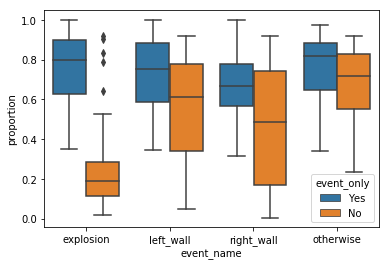

In [96]:
#print(significance_test_proportions_frame(proportions_frame))
left_walls_data, left_walls_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "left_wall", main_mixture_summary, summary_num_events_dataframe)
explosions_data, explosion_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "explosion", main_mixture_summary, summary_num_events_dataframe)
right_walls_data, right_walls_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "right_wall", main_mixture_summary, summary_num_events_dataframe)
otherwise_data, otherwise_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "otherwise", main_mixture_summary, summary_num_events_dataframe)

all_proportions = [explosion_proportions_frame, left_walls_proportions_frame, right_walls_proportions_frame, otherwise_proportions_frame]
all_proportions = pd.concat(all_proportions)
#print(all_proportions)

print("Significance explosion:")
significance_test_proportions_frame(explosion_proportions_frame)
print("Significance left walls:")
significance_test_proportions_frame(left_walls_proportions_frame)
print("Significance right walls:")
significance_test_proportions_frame(right_walls_proportions_frame)
print("Significance otherwise:")
significance_test_proportions_frame(otherwise_proportions_frame)

sns.boxplot(x="event_name", y="proportion", hue="event_only", data=all_proportions)
#sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(explosion_proportions_frame, id_vars=['event_only', 'variable']))

## Explosions

In [77]:
explosions_data, explosion_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "explosion", main_mixture_summary, summary_num_events_dataframe)
#print(explosions_data)
pd.melt(explosions_data, id_vars=['main_mixture'])

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


main_mixture   variable  value
0            Yes  explosion     40
1            Yes  explosion     35
2            Yes  explosion     25
3            Yes  explosion     19
4            Yes  explosion     48
5            Yes  explosion     37
6            Yes  explosion     92
7            Yes  explosion     96
8            Yes  explosion     31
9            Yes  explosion     74
10           Yes  explosion    150
11           Yes  explosion    110
12           Yes  explosion     21
13           Yes  explosion    122
14           Yes  explosion     40
15           Yes  explosion     60
16           Yes  explosion    134
17           Yes  explosion     33
18           Yes  explosion    159
19           Yes  explosion     36
20           Yes  explosion     32
21           Yes  explosion     26
22           Yes  explosion     69
23           Yes  explosion    100
24           Yes  explosion     42
25           Yes  explosion     27
26           Yes  explosion    141
27           Yes  explosion    126
28           Yes  explosion     41
29           Yes  explosion     16
..           ...        ...    ...
210           No      total    587
211           No      total    587
212           No      total    680
213           No      total    754
214           No      total    630
215           No      total    708
216           No      total    645
217           No      total    540
218           No      total    676
219           No      total    760
220           No      total    841
221           No      total    592
222           No      total    541
223           No      total    698
224           No      total    691
225           No      total    916
226           No      total    602
227           No      total    726
228           No      total    673
229           No      total    611
230           No      total    525
231           No      total    640
232           No      total    819
233           No      total    528
234           No      total    643
235           No      total    653
236           No      total    689
237           No      total    725
238           No      total    778
239           No      total    741

[240 rows x 3 columns]

/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


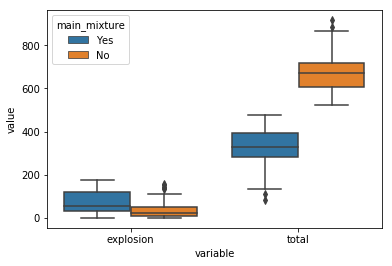

In [28]:
import seaborn as sns
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(explosions_data, id_vars=['main_mixture']))



In [30]:
significance_test(explosions_data, 'explosion')

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2683.0, pvalue=3.613274685577349e-06)
MannwhitneyuResult(statistic=0.0, pvalue=3.551006166496437e-21)


Significance explosion:
MannwhitneyuResult(statistic=3534.0, pvalue=9.145521449285073e-20)
Significance left walls:
MannwhitneyuResult(statistic=3395.0, pvalue=5.798131853625141e-17)
Significance right walls:
MannwhitneyuResult(statistic=3465.0, pvalue=2.379799195479362e-18)
Significance otherwise:
MannwhitneyuResult(statistic=3185.0, pvalue=3.677844207728089e-13)


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


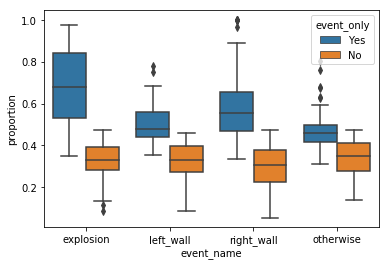

In [84]:
#print(significance_test_proportions_frame(proportions_frame))
left_walls_data, left_walls_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "left_wall", main_mixture_summary, summary_num_events_dataframe)
explosions_data, explosion_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "explosion", main_mixture_summary, summary_num_events_dataframe)
right_walls_data, right_walls_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "right_wall", main_mixture_summary, summary_num_events_dataframe)
otherwise_data, otherwise_proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "otherwise", main_mixture_summary, summary_num_events_dataframe)

all_proportions = [explosion_proportions_frame, left_walls_proportions_frame, right_walls_proportions_frame, otherwise_proportions_frame]
all_proportions = pd.concat(all_proportions)
#print(all_proportions)

print("Significance explosion:")
significance_test_proportions_frame(explosion_proportions_frame)
print("Significance left walls:")
significance_test_proportions_frame(left_walls_proportions_frame)
print("Significance right walls:")
significance_test_proportions_frame(right_walls_proportions_frame)
print("Significance otherwise:")
significance_test_proportions_frame(otherwise_proportions_frame)

sns.boxplot(x="event_name", y="proportion", hue="event_only", data=all_proportions)
#sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(explosion_proportions_frame, id_vars=['event_only', 'variable']))

## Left Walls

In [32]:
left_walls_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "left_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(left_walls_data, "left_wall")
#Result: Left wall far more common in main mixture. However, the total
#distribution of this mixture is not significantly larger than others.
pd.melt(left_walls_data, id_vars=['main_mixture'])

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=1748.0, pvalue=0.7868256228905605)
MannwhitneyuResult(statistic=0.0, pvalue=3.548782574336205e-21)


main_mixture   variable  value
0            Yes  left_wall     31
1            Yes  left_wall      9
2            Yes  left_wall     21
3            Yes  left_wall     20
4            Yes  left_wall     16
5            Yes  left_wall     44
6            Yes  left_wall      7
7            Yes  left_wall      5
8            Yes  left_wall      4
9            Yes  left_wall     31
10           Yes  left_wall     14
11           Yes  left_wall     20
12           Yes  left_wall     16
13           Yes  left_wall     31
14           Yes  left_wall     28
15           Yes  left_wall     28
16           Yes  left_wall     26
17           Yes  left_wall     53
18           Yes  left_wall      7
19           Yes  left_wall     24
20           Yes  left_wall     14
21           Yes  left_wall     25
22           Yes  left_wall     37
23           Yes  left_wall     11
24           Yes  left_wall     27
25           Yes  left_wall     38
26           Yes  left_wall     18
27           Yes  left_wall      6
28           Yes  left_wall     63
29           Yes  left_wall     49
..           ...        ...    ...
210           No      total    587
211           No      total    757
212           No      total    752
213           No      total    684
214           No      total    751
215           No      total    726
216           No      total    645
217           No      total    540
218           No      total    685
219           No      total    570
220           No      total    556
221           No      total    665
222           No      total    815
223           No      total    668
224           No      total    775
225           No      total    644
226           No      total    695
227           No      total    697
228           No      total    673
229           No      total    611
230           No      total    850
231           No      total    590
232           No      total    574
233           No      total    722
234           No      total    815
235           No      total    914
236           No      total    806
237           No      total    725
238           No      total    654
239           No      total    674

[240 rows x 3 columns]

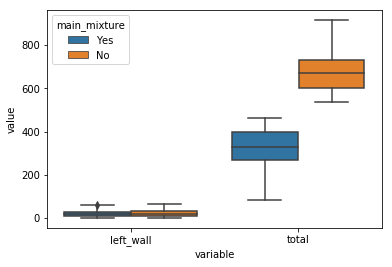

In [33]:
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(left_walls_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=3395.0, pvalue=5.798131853625141e-17)
None


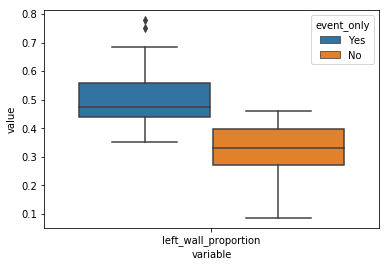

In [34]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Right Walls

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=2095.0, pvalue=0.12157112330415348)
MannwhitneyuResult(statistic=0.0, pvalue=3.543229415377381e-21)


/home/kaiolae/.virtualenvs/world_models_cpu/lib/python3.6/site-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide


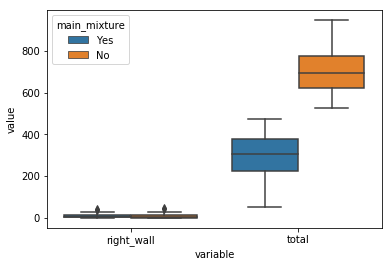

In [35]:
right_walls_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "right_wall", main_mixture_summary, summary_num_events_dataframe)
significance_test(right_walls_data, "right_wall")
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(right_walls_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=3465.0, pvalue=2.379799195479362e-18)
None


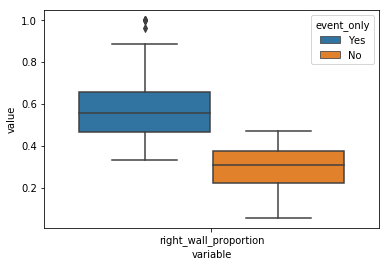

In [36]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))

## Fireballs

Significant differences between number of the event in main vs all other mixtures
Significant differences between number of ANY event in main vs all other mixtures
MannwhitneyuResult(statistic=38.0, pvalue=2.3352616357723863e-20)
MannwhitneyuResult(statistic=0.0, pvalue=3.5365765886427624e-21)


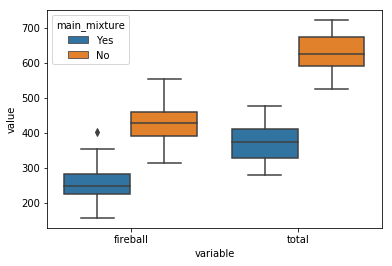

In [37]:
fireball_data, proportions_frame = count_events_in_main_vs_other_mixtures(events_dataframe, "fireball", main_mixture_summary, summary_num_events_dataframe)
significance_test(fireball_data, "fireball")
#Fireball more common in main mixture, but this mixture is so dominating
#that this is to be expected.
pd.melt(right_walls_data, id_vars=['main_mixture'])
sns.boxplot(x="variable", y="value", hue="main_mixture", data=pd.melt(fireball_data, id_vars=['main_mixture']))

Significant differences between proportion of the mixture in event vs in all frames
MannwhitneyuResult(statistic=1808.0, pvalue=0.9685985699152948)
None


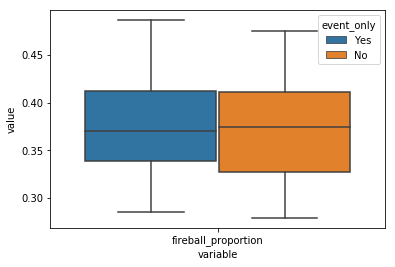

In [38]:
print(significance_test_proportions_frame(proportions_frame))
sns.boxplot(x="variable", y="value", hue="event_only", data=pd.melt(proportions_frame, id_vars=['event_only']))